### Install and import pycatcher package

In [1]:
pip install pycatcher --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pycatcher as pc
import pandas as pd

### Package functions to detect outliers

- detect_outliers_classic(df): Detect outliers in a time-series dataframe using seasonal trend decomposition. 
- detect_outliers_today_classic(df) Detect outliers for the current date using Classical Seasonal Decomposition.
- detect_outliers_latest_classic(df): Detect latest outliers using Classical Seasonal Decomposition.
- detect_outliers_stl(df): Detect outliers using Seasonal-Trend Decomposition using LOESS (STL).
- detect_outliers_mstl(df): Detect outliers using Multiple Seasonal-Trend Decomposition using LOESS (MSTL).
- detect_outliers_esd(df): Detect outliers using using the Extreme Studentized Deviate (ESD) algorithm. 
- detect_outliers_today_stl(df) Detect outliers for the current date using Seasonal-Trend Decomposition using LOESS (STL).
- detect_outliers_latest_stl(df): Detect latest outliers using Seasonal-Trend Decomposition using LOESS (STL).
- detect_outliers_today_mstl(df) Detect outliers for the current date using MSTL.
- detect_outliers_latest_mstl(df): Detect latest outliers using MSTL.
- detect_outliers_latest_esd(df): Detect latest outliers using ESD.
- detect_outliers_today_esd(df) Detect outliers for the current date using ESD.
- detect_outliers_iqr(df): Detect outliers in a time-series dataframe when there's less than 2 years of data.
- detect_outliers_moving_average(df): Detect outliers using moving average method.

##### Note - Use seasonal decomposition algorithms when there is at least 2 years of data, otherwise we can use Interquartile Range (IQR) or Moving Average methods for smaller timeframe.

### Diagnostic functions for plotting

In [3]:
from pycatcher.diagnostics import build_seasonal_plot_classic as build_seasonal_plot_classic
from pycatcher.diagnostics import build_outliers_plot_classic as build_outliers_plot_classic
from pycatcher.diagnostics import build_outliers_plot_moving_average as build_outliers_plot_moving_average
from pycatcher.diagnostics import build_outliers_plot_stl as build_outliers_plot_stl
from pycatcher.diagnostics import build_seasonal_plot_stl as build_seasonal_plot_stl
from pycatcher.diagnostics import build_outliers_plot_mstl as build_outliers_plot_mstl
from pycatcher.diagnostics import build_outliers_plot_esd as build_outliers_plot_esd
from pycatcher.diagnostics import build_seasonal_plot_mstl as build_seasonal_plot_mstl
from pycatcher.diagnostics import build_monthwise_plot as build_monthwise_plot
from pycatcher.diagnostics import build_iqr_plot as build_iqr_plot
from pycatcher.diagnostics import build_decomposition_results as build_decomposition_results
from pycatcher.diagnostics import conduct_stationarity_check as conduct_stationarity_check

### Example 1 - Finding Outliers Using Classical Seasonal Decomposition Algorithm

In [4]:
!pip install fsspec

In [5]:
!pip install --upgrade certifi

In [6]:
# Read TSA Air passenger dataset

df_tsa=pd.read_csv("https://huggingface.co/datasets/bbgatch/tsa-passengers/resolve/main/tsa.csv",sep=',')
df_tsa.head(5)

,date,passengers
0,2019-01-01,2201765
1,2019-01-02,2424225
2,2019-01-03,2279384
3,2019-01-04,2230078
4,2019-01-05,2049460


In [7]:
# Read Air passenger dataset

df_air=pd.read_csv(
    "https://raw.githubusercontent.com/kennedykwangari/Time-Series-Analysis-and-Forecasting-with-Python/refs/heads/master/AirPassengers.csv",sep=',')  
df_air.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
# Read Ice cream interest dataset

df_ice = pd.read_csv("https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_interest.csv")
df_ice.head(10)

,month,interest
0,2004-01,13
1,2004-02,15
2,2004-03,17
3,2004-04,19
4,2004-05,22
5,2004-06,25
6,2004-07,27
7,2004-08,21
8,2004-09,18
9,2004-10,14


In [9]:
df_tsa.head(5)

,date,passengers
0,2019-01-01,2201765
1,2019-01-02,2424225
2,2019-01-03,2279384
3,2019-01-04,2230078
4,2019-01-05,2049460


In [10]:
x = pc.detect_outliers_latest_classic(df_tsa) 
print(x)

            passengers
date                  
2024-07-09     2580013


/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
x = pc.detect_outliers_classic(df_tsa) 
print(x)

            passengers
date                  
2019-01-20     1845674
2019-05-26     2070716
2019-05-28     2453649
2019-07-04     2088760
2019-07-05     2184253
2019-09-01     1887845
2019-11-26     2435170
2019-11-27     2624250
2019-11-28     1591158
2019-11-29     1968137
2019-11-30     2648268
2019-12-01     2882915
2019-12-25     1996541
2020-11-26      562697
2020-12-23     1244556
2020-12-25      683838
2020-12-31      914456
2021-01-01      849514
2021-01-02     1246953
2021-07-04     1697422
2021-11-23     2217635
2021-11-24     2331880
2021-11-25     1383501
2021-11-26     1783938
2021-11-27     2219149
2021-11-28     2458325
2021-12-24     1713351
2021-12-31     1658357
2022-09-04     1979923
2022-11-22     2370351
2022-11-23     2465337
2022-11-24     1426195
2022-11-25     1984980
2022-11-26     2336633
2022-11-27     2639616
2022-12-21     2428528
2022-12-25     1800463
2023-01-03     2212528
2023-05-28     2257797
2023-09-03     2081144
2023-10-31     1665839
2023-11-21 

/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [12]:
x = pc.detect_outliers_today_classic(df_tsa) 
print(x)

No Outliers Today!


/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
x = pc.detect_outliers_latest_classic(df_tsa) 
print(x)

            passengers
date                  
2024-07-09     2580013


/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2025-07-01 14:33:44,150 - INFO - Building outlier plot using classical seasonal decomposition.
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-07-01 14:33:44,158 - INFO - Completing outlier detection using classical seasonal decomposition
2025-07-01 14:33:44,174 - INFO - Completing outlier plot using classical seasonal decomposition.


Additive Model
Outliers:             passengers
date                  
2019-01-20     1845674
2019-05-26     2070716
2019-05-28     2453649
2019-07-04     2088760
2019-07-05     2184253
2019-09-01     1887845
2019-11-26     2435170
2019-11-27     2624250
2019-11-28     1591158
2019-11-29     1968137
2019-11-30     2648268
2019-12-01     2882915
2019-12-25     1996541
2020-11-26      562697
2020-12-23     1244556
2020-12-25      683838
2020-12-31      914456
2021-01-01      849514
2021-01-02     1246953
2021-07-04     1697422
2021-11-23     2217635
2021-11-24     2331880
2021-11-25     1383501
2021-11-26     1783938
2021-11-27     2219149
2021-11-28     2458325
2021-12-24     1713351
2021-12-31     1658357
2022-09-04     1979923
2022-11-22     2370351
2022-11-23     2465337
2022-11-24     1426195
2022-11-25     1984980
2022-11-26     2336633
2022-11-27     2639616
2022-12-21     2428528
2022-12-25     1800463
2023-01-03     2212528
2023-05-28     2257797
2023-09-03     2081144
2023-10-3

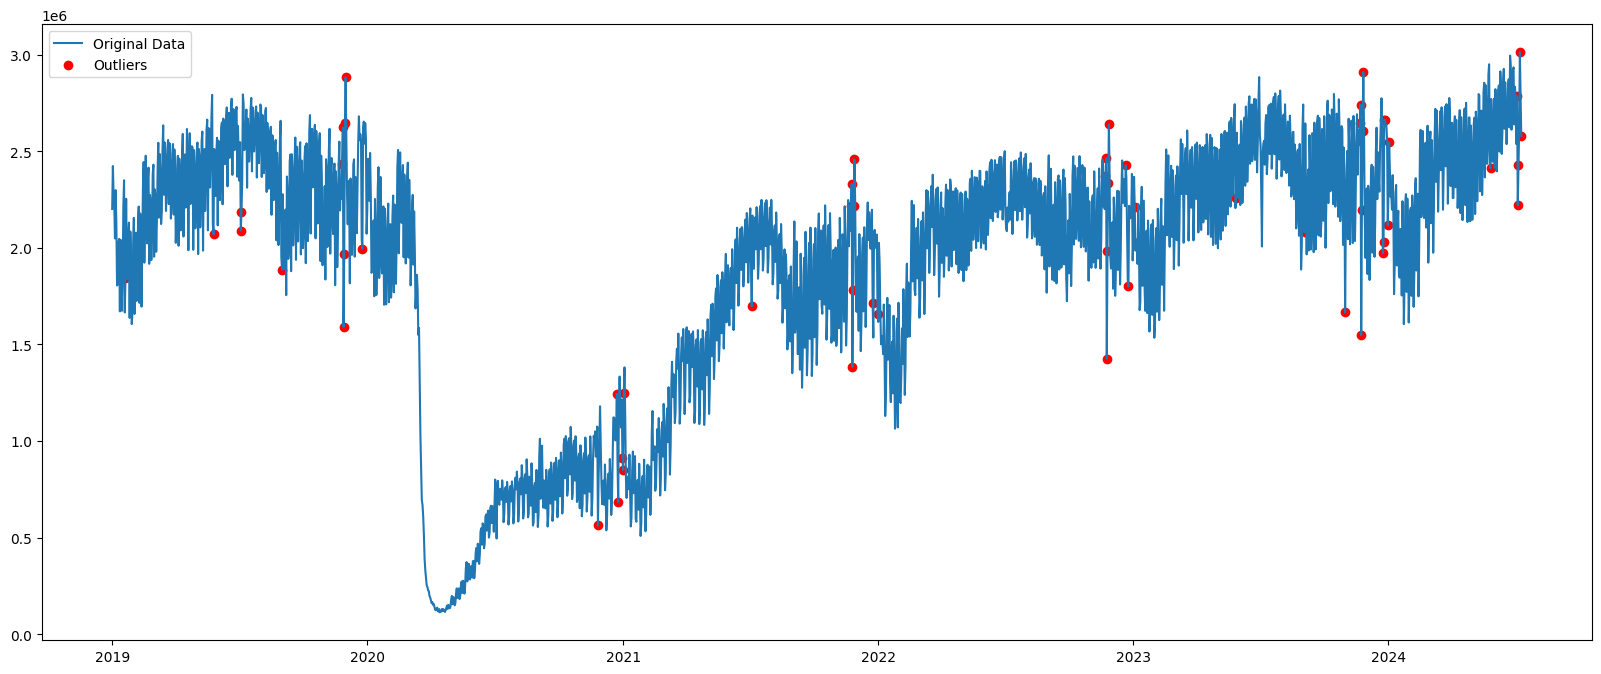

In [14]:
pc.build_outliers_plot_classic(df_tsa)

In [15]:
pc.detect_outliers_classic(df_air) 

/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,#Passengers
Month,
1949-02-01,118
1960-03-01,419


2025-07-01 14:33:44,306 - INFO - Building outlier plot using classical seasonal decomposition.
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Multiplicative Model


2025-07-01 14:33:44,313 - INFO - Completing outlier detection using classical seasonal decomposition
2025-07-01 14:33:44,320 - INFO - Completing outlier plot using classical seasonal decomposition.


Outliers:             #Passengers
Month                  
1949-02-01          118
1960-03-01          419


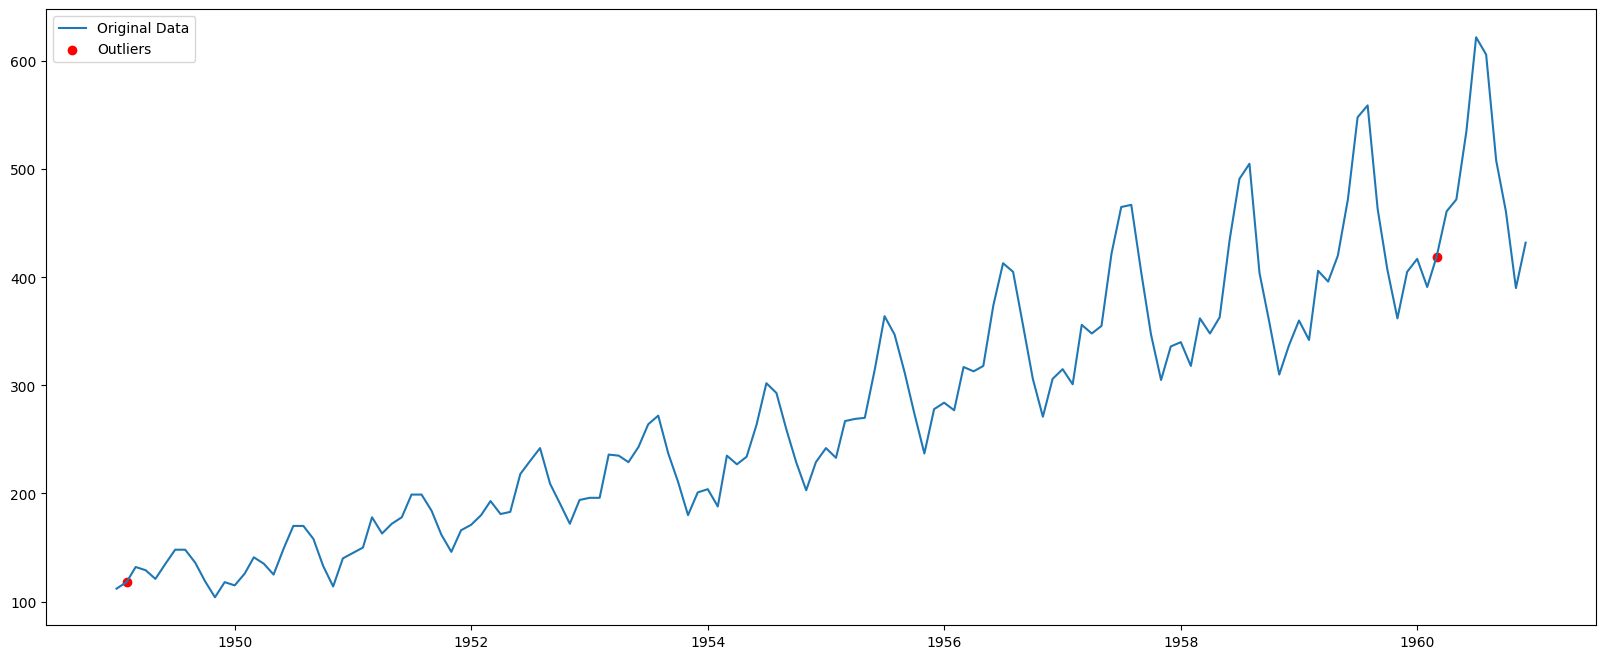

In [16]:
pc.build_outliers_plot_classic(df_air)

2025-07-01 14:33:44,397 - INFO - Building month-wise box plot.
2025-07-01 14:33:44,421 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-01 14:33:44,426 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


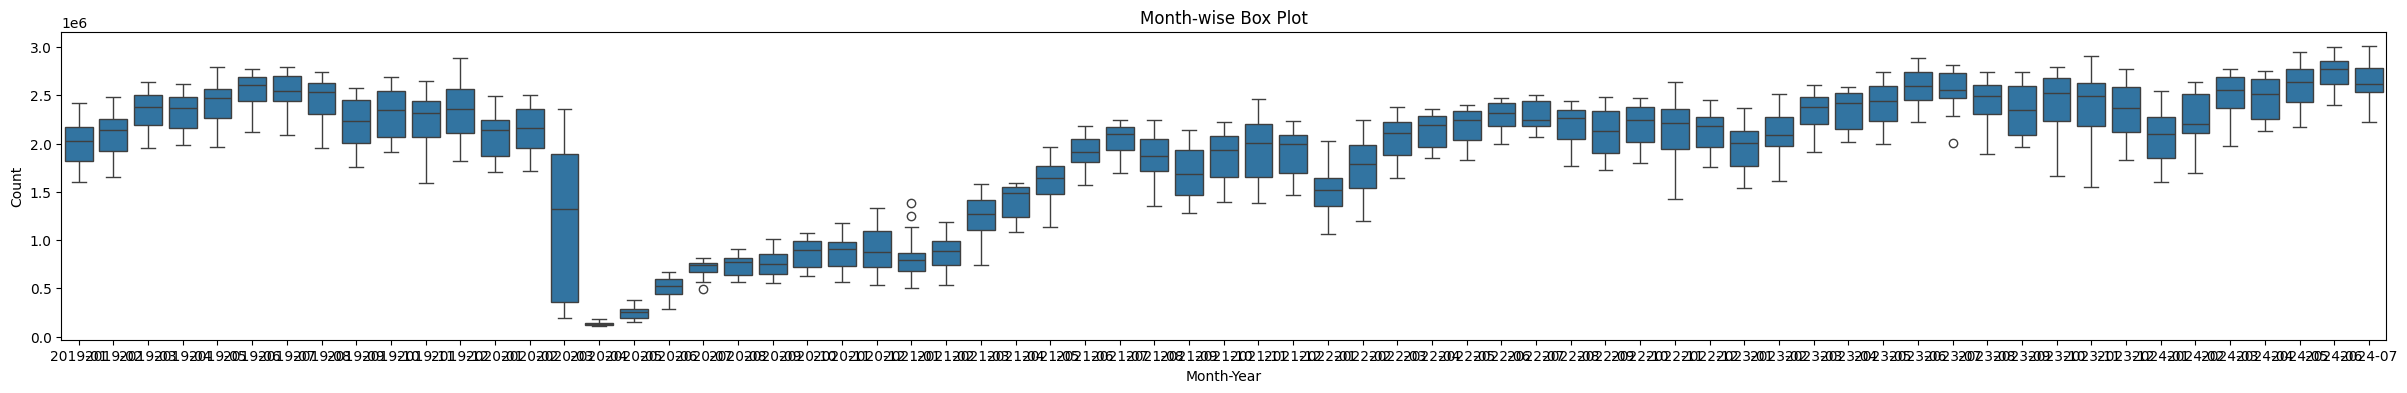

In [17]:
#Diagnostic plots
pc.build_monthwise_plot(df_tsa)

2025-07-01 14:33:44,661 - INFO - Building time-series plot for seasonal decomposition.
2025-07-01 14:33:44,665 - INFO - Time frequency: D
2025-07-01 14:33:44,665 - INFO - Length of time index: 2017
2025-07-01 14:33:44,665 - INFO - Building seasonal plot based on classical seasonal decomposition
2025-07-01 14:33:44,681 - INFO - Plotting seasonal decomposition with title: Additive
2025-07-01 14:33:44,730 - INFO - Completing seasonal plot based on classical seasonal decomposition.
2025-07-01 14:33:44,730 - INFO - Completing Time series frequency detection


Using Additive model for seasonal decomposition.


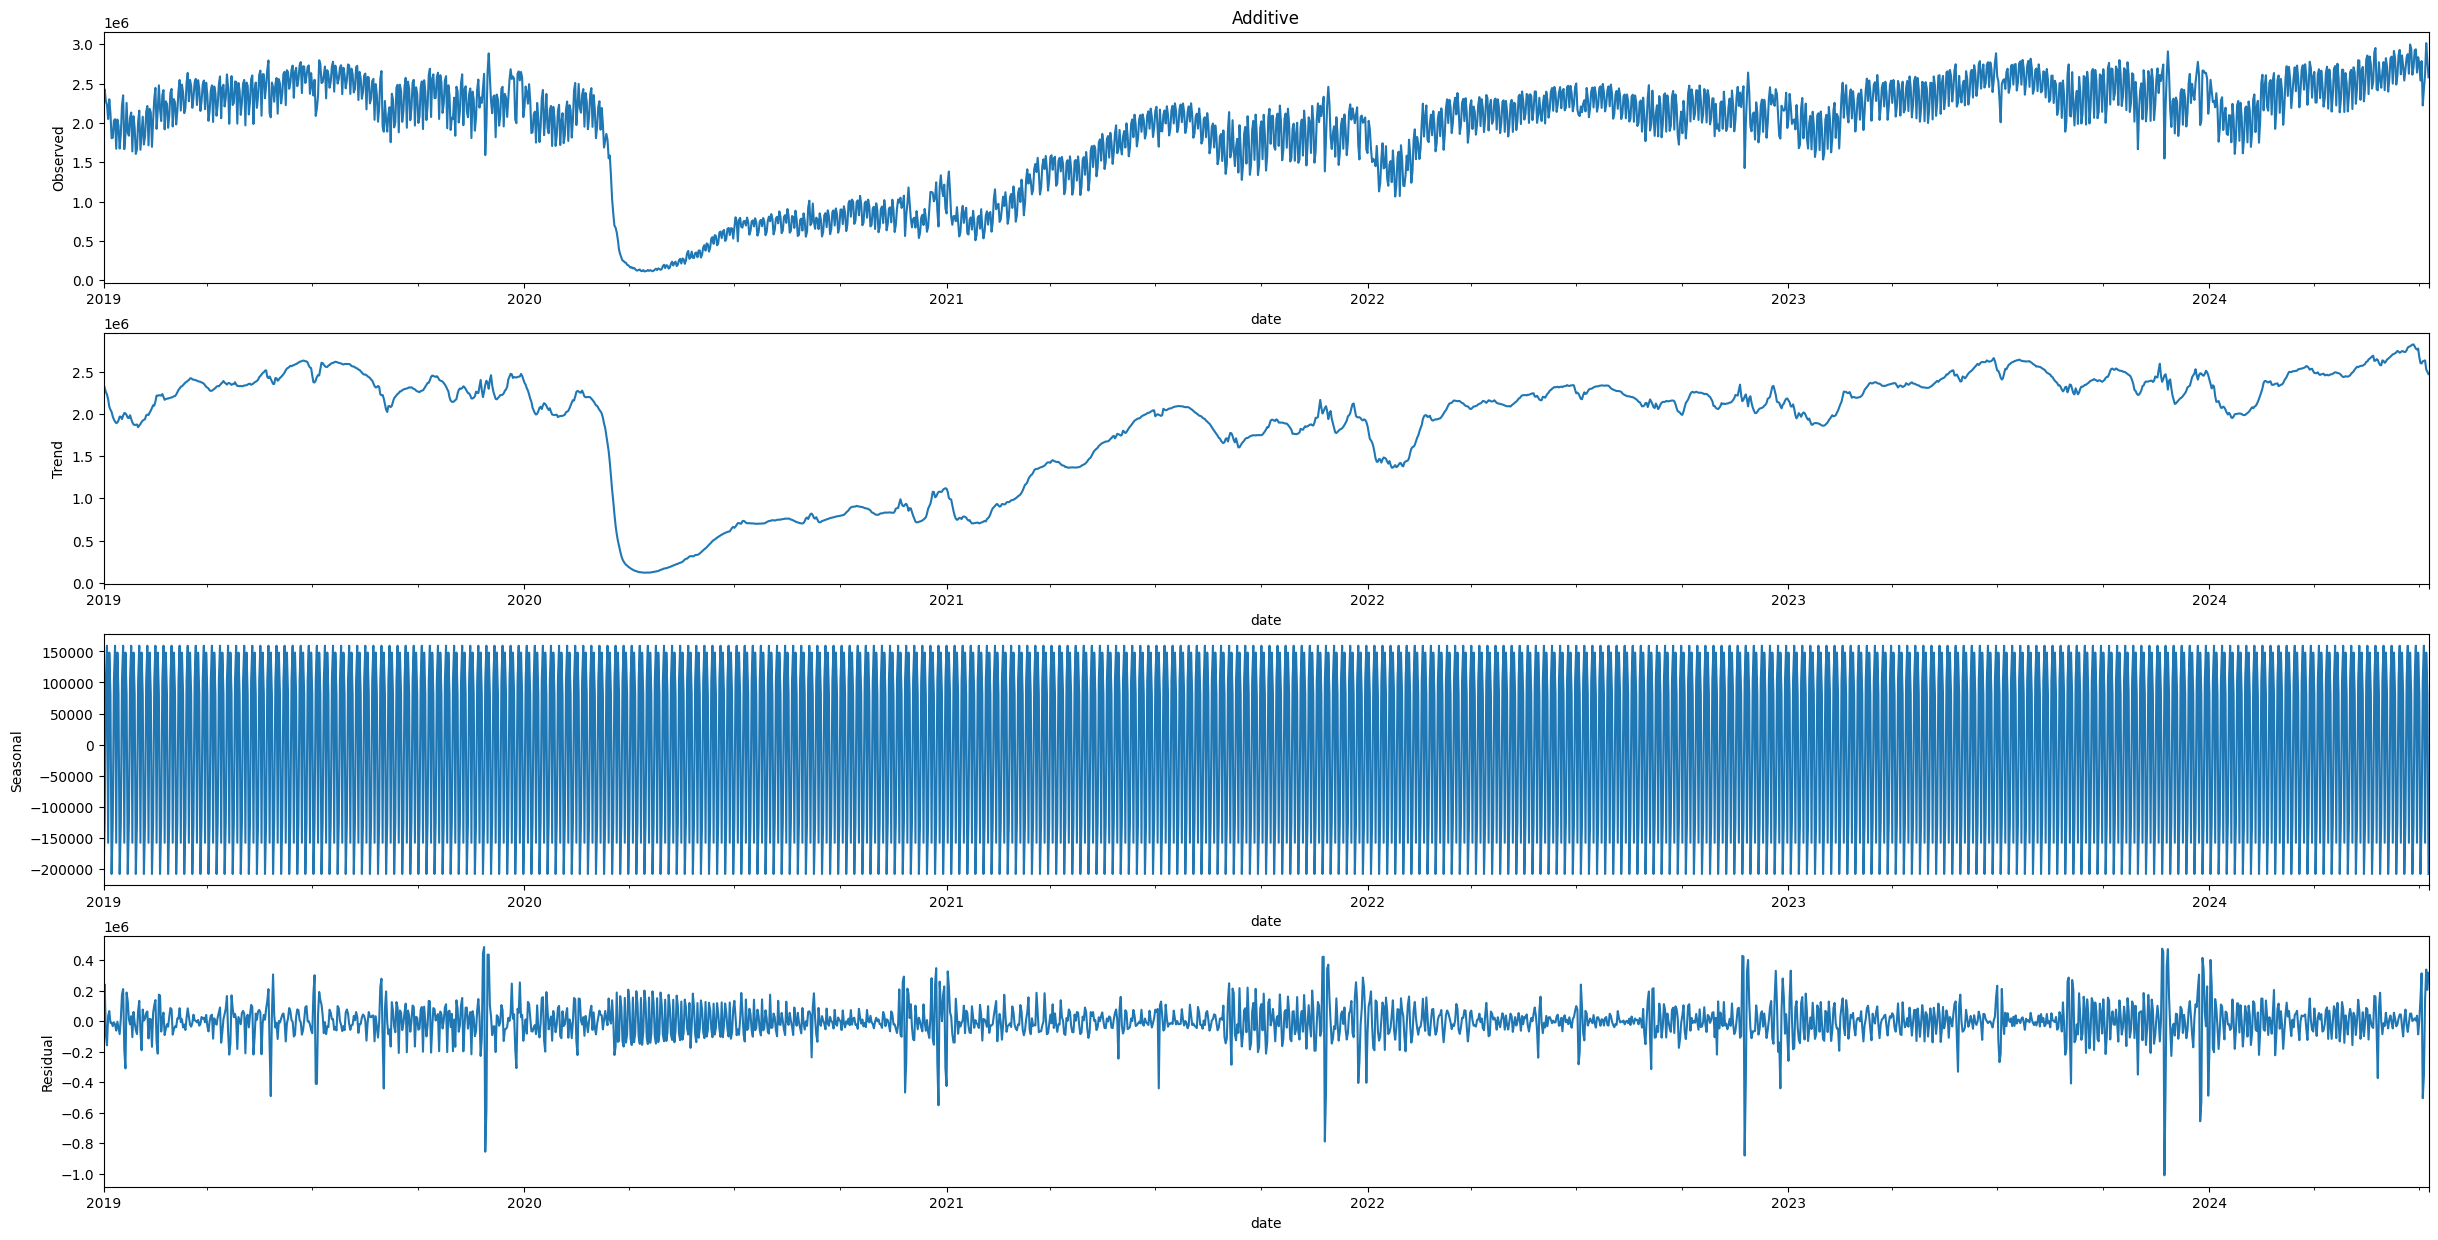

In [18]:
#Diagnostic plots
pc.build_seasonal_plot_classic(df_tsa)

2025-07-01 14:33:44,987 - INFO - Building time-series plot for seasonal decomposition.
2025-07-01 14:33:44,988 - INFO - Time frequency: MS
2025-07-01 14:33:44,989 - INFO - Length of time index: 144
2025-07-01 14:33:44,989 - INFO - Building seasonal plot based on classical seasonal decomposition
2025-07-01 14:33:45,003 - INFO - Plotting seasonal decomposition with title: Multiplicative
2025-07-01 14:33:45,025 - INFO - Completing seasonal plot based on classical seasonal decomposition.
2025-07-01 14:33:45,025 - INFO - Completing Time series frequency detection


Using Multiplicative model for seasonal decomposition.


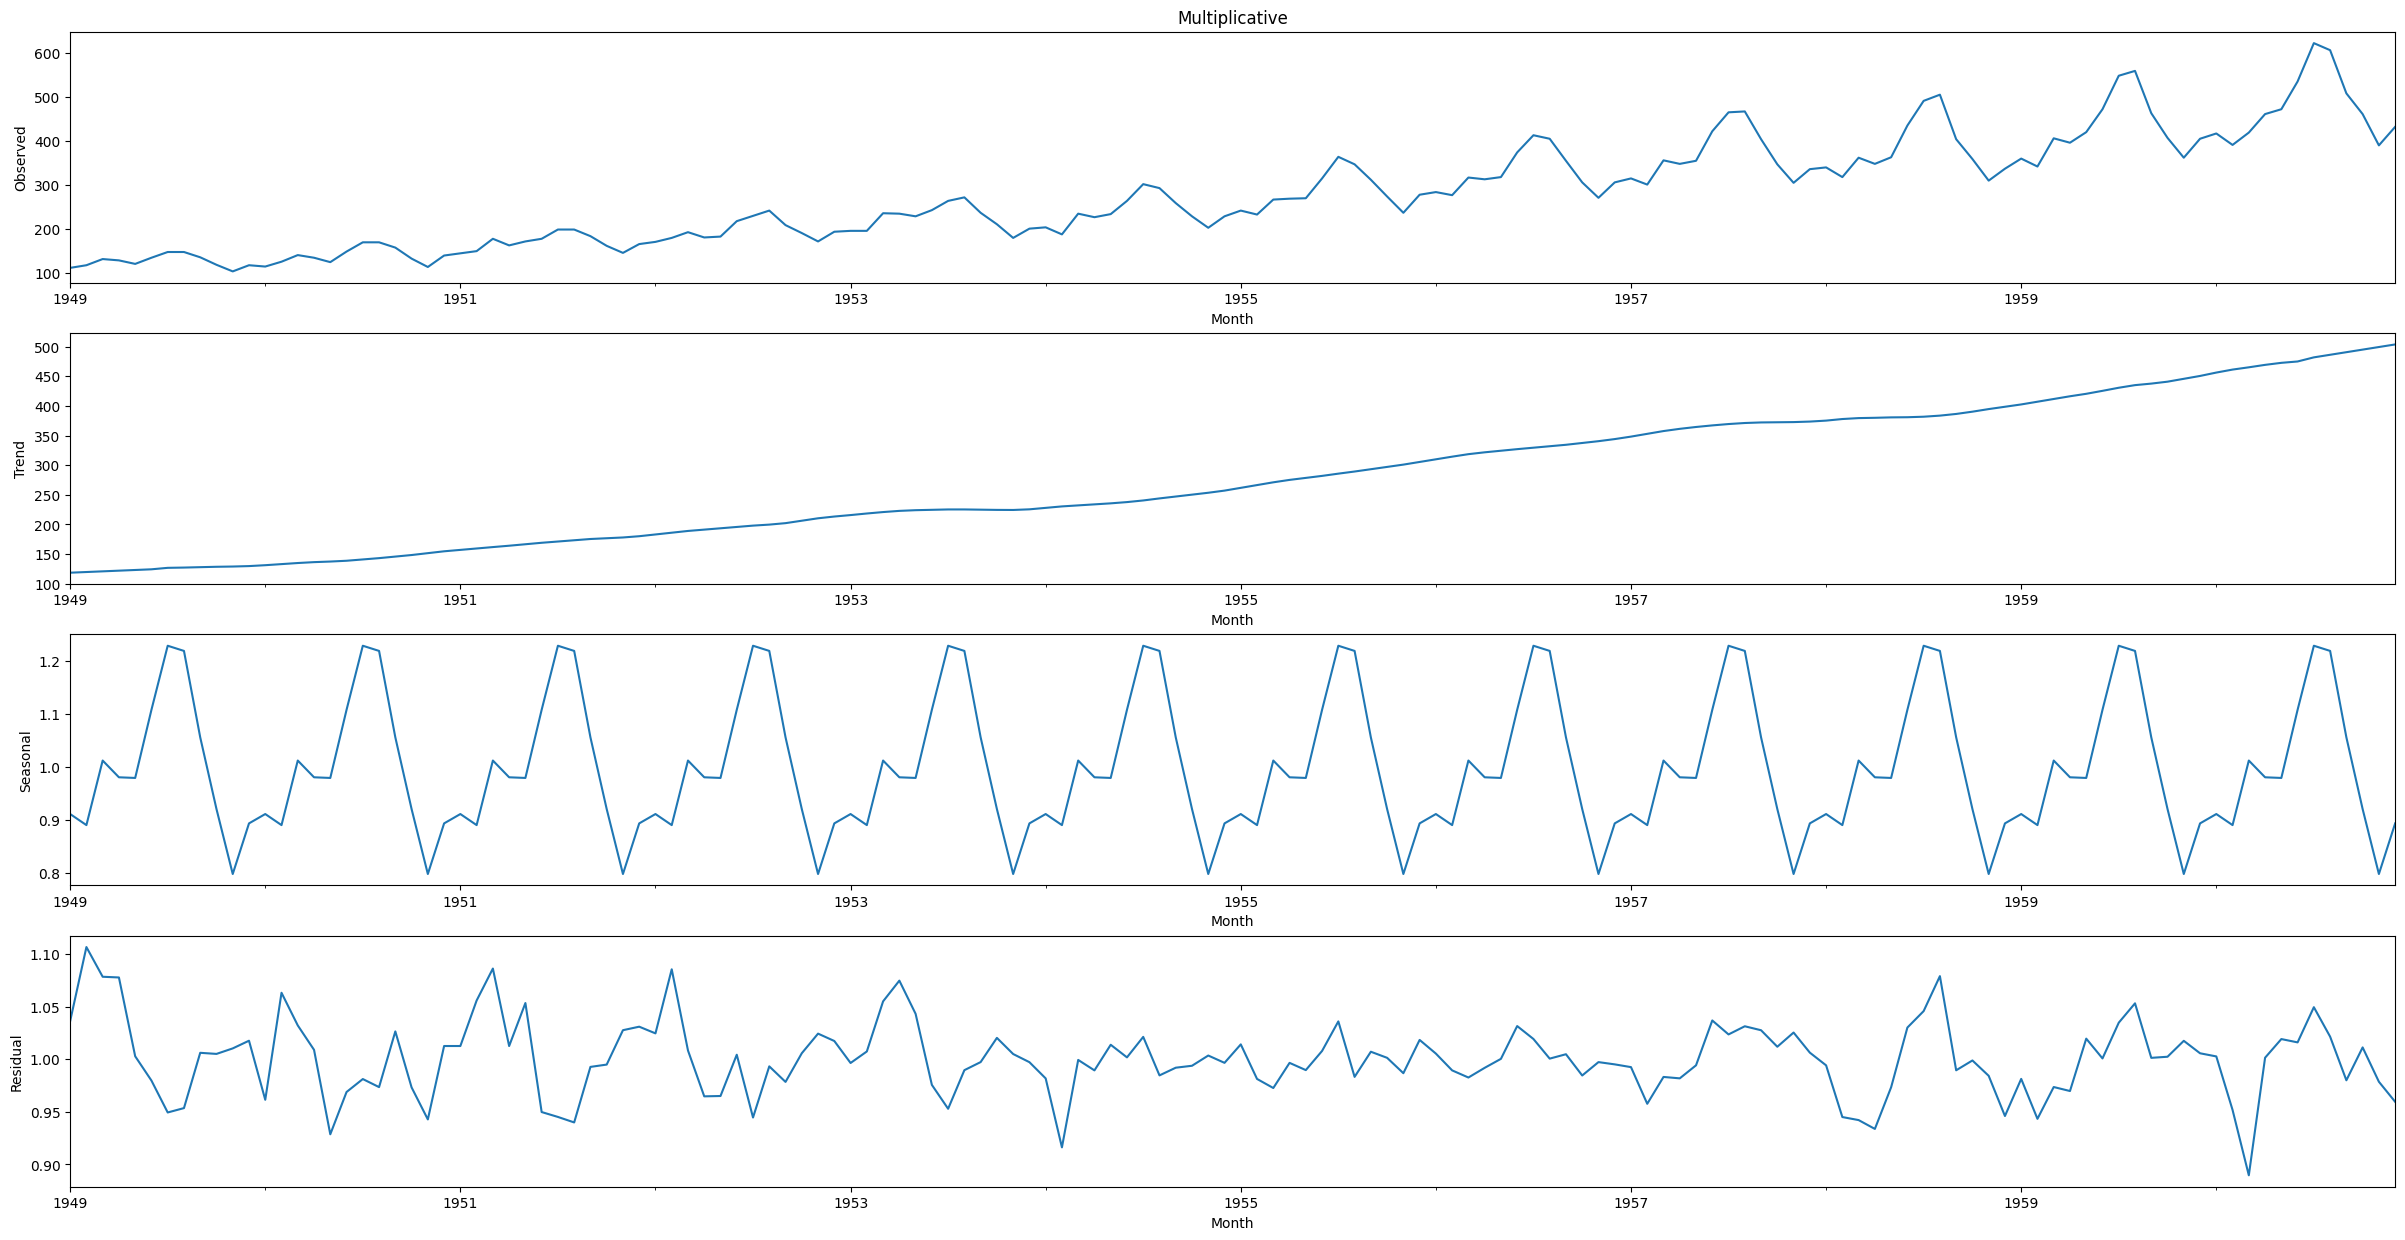

In [19]:
pc.build_seasonal_plot_classic(df_air)

In [20]:
x = pc.detect_outliers_classic(df_ice) 
print(x)

            interest
month               
2011-04-01        45
2016-11-01        46
2016-12-01        66


/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Example 2 - Finding Outliers Using Seasonal-Trend Decomposition using LOESS (STL)

In [21]:
pc.detect_outliers_stl(df_ice)

2025-07-01 14:33:45,280 - INFO - Detected Period: 12
2025-07-01 14:33:45,280 - INFO - Derived Seasonal: 13
2025-07-01 14:33:45,287 - INFO - Additive model detected
2025-07-01 14:33:45,287 - INFO - Generating outlier detection using STL
2025-07-01 14:33:45,288 - INFO - Outlier detection using STL Additive Model
2025-07-01 14:33:45,725 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:45,726 - INFO - Generated outlier detection using STL
2025-07-01 14:33:45,726 - INFO - Completing outlier detection using STL


,month,interest
0,2011-04-01,45
1,2016-11-01,46
2,2016-12-01,66
3,2019-07-01,100


2025-07-01 14:33:45,730 - INFO - Starting outlier detection using STL
2025-07-01 14:33:45,731 - INFO - Time frequency: MS
2025-07-01 14:33:45,732 - INFO - Length of time index: 200.00
2025-07-01 14:33:45,736 - INFO - Additive model detected
2025-07-01 14:33:45,736 - INFO - Generating outlier detection using STL
2025-07-01 14:33:45,737 - INFO - Outlier detection using STL Additive Model


Detected Period:  12
Derived Seasonal:  13


2025-07-01 14:33:46,173 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:46,174 - INFO - Generated outlier detection using STL
2025-07-01 14:33:46,174 - INFO - Completing outlier detection using STL


Outliers:             interest
month               
2011-04-01        45
2016-11-01        46
2016-12-01        66
2019-07-01       100


<module 'matplotlib.pyplot' from '/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

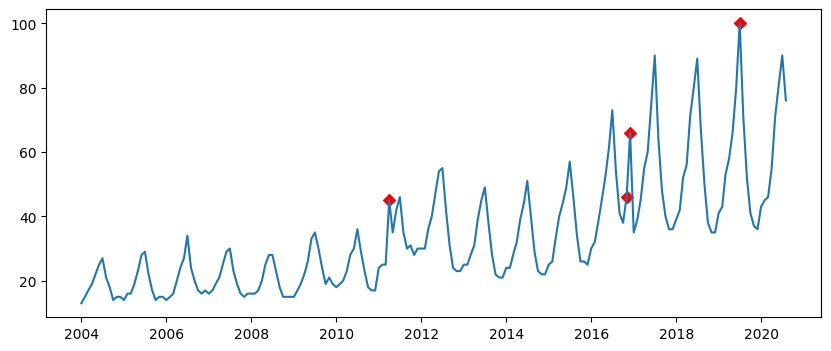

In [22]:
build_outliers_plot_stl(df_ice)

In [23]:
pc.detect_outliers_stl(df_tsa)

2025-07-01 14:33:46,250 - INFO - Detected Period: 365
2025-07-01 14:33:46,250 - INFO - Derived Seasonal: 365
2025-07-01 14:33:46,803 - INFO - Multiplicative model detected
2025-07-01 14:33:46,803 - INFO - Generating outlier detection using STL
2025-07-01 14:33:46,804 - INFO - Outlier detection using STL Multiplicative Model
2025-07-01 14:33:47,911 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:47,912 - INFO - Generated outlier detection using STL
2025-07-01 14:33:47,912 - INFO - Completing outlier detection using STL


,date,passengers
0,2019-09-13,2484025
1,2019-10-04,2526835
2,2019-12-25,1996541
3,2020-01-05,2491894
4,2020-01-12,2253585
5,2020-01-16,2312979
6,2020-01-17,2418305
7,2020-01-19,2064997
8,2020-01-20,2367538
9,2020-01-23,2169321


In [24]:
pc.detect_outliers_today_stl(df_tsa) 

2025-07-01 14:33:47,916 - INFO - Detecting today's outliers.
2025-07-01 14:33:47,918 - INFO - Detected Period: 365
2025-07-01 14:33:47,918 - INFO - Derived Seasonal: 365
2025-07-01 14:33:48,469 - INFO - Multiplicative model detected
2025-07-01 14:33:48,469 - INFO - Generating outlier detection using STL
2025-07-01 14:33:48,469 - INFO - Outlier detection using STL Multiplicative Model
2025-07-01 14:33:49,581 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:49,582 - INFO - Generated outlier detection using STL
2025-07-01 14:33:49,582 - INFO - Completing outlier detection using STL
2025-07-01 14:33:49,582 - INFO - No outliers detected today.


'No Outliers Today!'

In [25]:
# Less than 2 years of data 

df = {
        'Dt': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
        'Value': [100, 120, 140, 250, 450]
}

df = pd.DataFrame(df)
pc.detect_outliers_stl(df)

,Dt,Value
4,2024-01-05,450


2025-07-01 14:33:49,591 - INFO - Starting outlier detection using STL
2025-07-01 14:33:49,596 - INFO - Time frequency: D
2025-07-01 14:33:49,597 - INFO - Length of time index: 2017.00


Detected Period:  365
Derived Seasonal:  365


2025-07-01 14:33:50,148 - INFO - Multiplicative model detected
2025-07-01 14:33:50,148 - INFO - Generating outlier detection using STL
2025-07-01 14:33:50,148 - INFO - Outlier detection using STL Multiplicative Model
2025-07-01 14:33:51,228 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:51,229 - INFO - Generated outlier detection using STL
2025-07-01 14:33:51,230 - INFO - Completing outlier detection using STL


Outliers:             passengers
date                  
2019-09-13     2484025
2019-10-04     2526835
2019-12-25     1996541
2020-01-05     2491894
2020-01-12     2253585
2020-01-16     2312979
2020-01-17     2418305
2020-01-19     2064997
2020-01-20     2367538
2020-01-23     2169321
2020-01-24     2215449
2020-01-26     2203488
2020-01-30     2154295
2020-01-31     2229563
2020-02-02     2011645
2020-02-03     2123304
2020-02-06     2167857
2020-02-07     2271551
2020-02-09     2224826
2020-02-10     2164951
2020-02-12     2038375
2020-02-13     2415185
2020-02-14     2507588
2020-02-16     2198657
2020-02-17     2494922
2020-02-20     2358511
2020-02-21     2429489
2020-02-23     2380359
2020-02-24     2267382
2020-02-26     2075554
2020-02-27     2364727
2020-02-28     2441643
2020-03-01     2353150
2020-03-02     2163067
2020-03-05     2203821
2020-03-08     2189961
2020-08-26      578447
2020-11-25     1074824
2020-11-27      821789
2020-12-23     1244556
2021-11-22     2087536
2

<module 'matplotlib.pyplot' from '/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

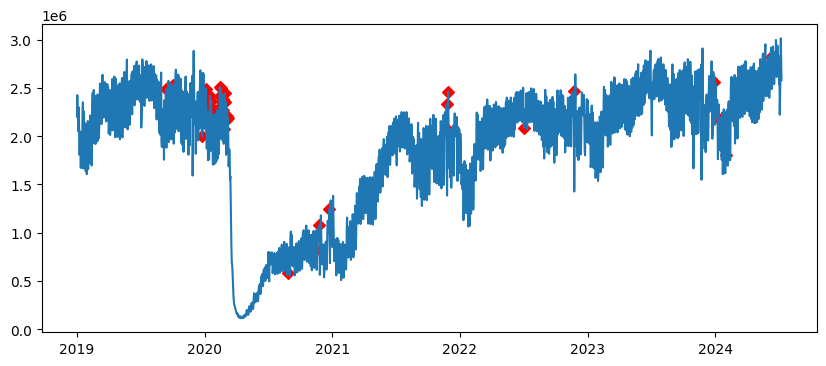

In [26]:
pc.build_outliers_plot_stl(df_tsa)

2025-07-01 14:33:51,288 - INFO - Starting outlier detection using STL
2025-07-01 14:33:51,290 - INFO - Time frequency: MS
2025-07-01 14:33:51,290 - INFO - Length of time index: 144.00
2025-07-01 14:33:51,294 - INFO - Additive model detected
2025-07-01 14:33:51,294 - INFO - Generating outlier detection using STL
2025-07-01 14:33:51,294 - INFO - Outlier detection using STL Additive Model


Detected Period:  12
Derived Seasonal:  13


2025-07-01 14:33:51,703 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:51,703 - INFO - Generated outlier detection using STL
2025-07-01 14:33:51,704 - INFO - Completing outlier detection using STL


Outliers:             #Passengers
Month                  
1953-04-01          235
1954-02-01          188
1958-04-01          348
1958-08-01          505
1958-12-01          337
1959-03-01          406
1960-03-01          419
1960-04-01          461


<module 'matplotlib.pyplot' from '/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

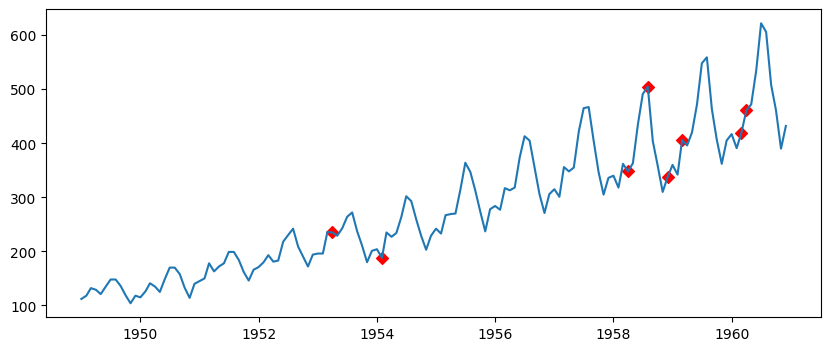

In [27]:
pc.build_outliers_plot_stl(df_air)

2025-07-01 14:33:51,756 - INFO - Starting outlier detection using STL
2025-07-01 14:33:51,757 - INFO - Time frequency: D
2025-07-01 14:33:51,758 - INFO - Length of time index: 2017.00


Detected Period:  365
Derived Seasonal:  365


2025-07-01 14:33:52,308 - INFO - Multiplicative model detected
2025-07-01 14:33:52,392 - INFO - Completing seasonal decomposition plot using STL


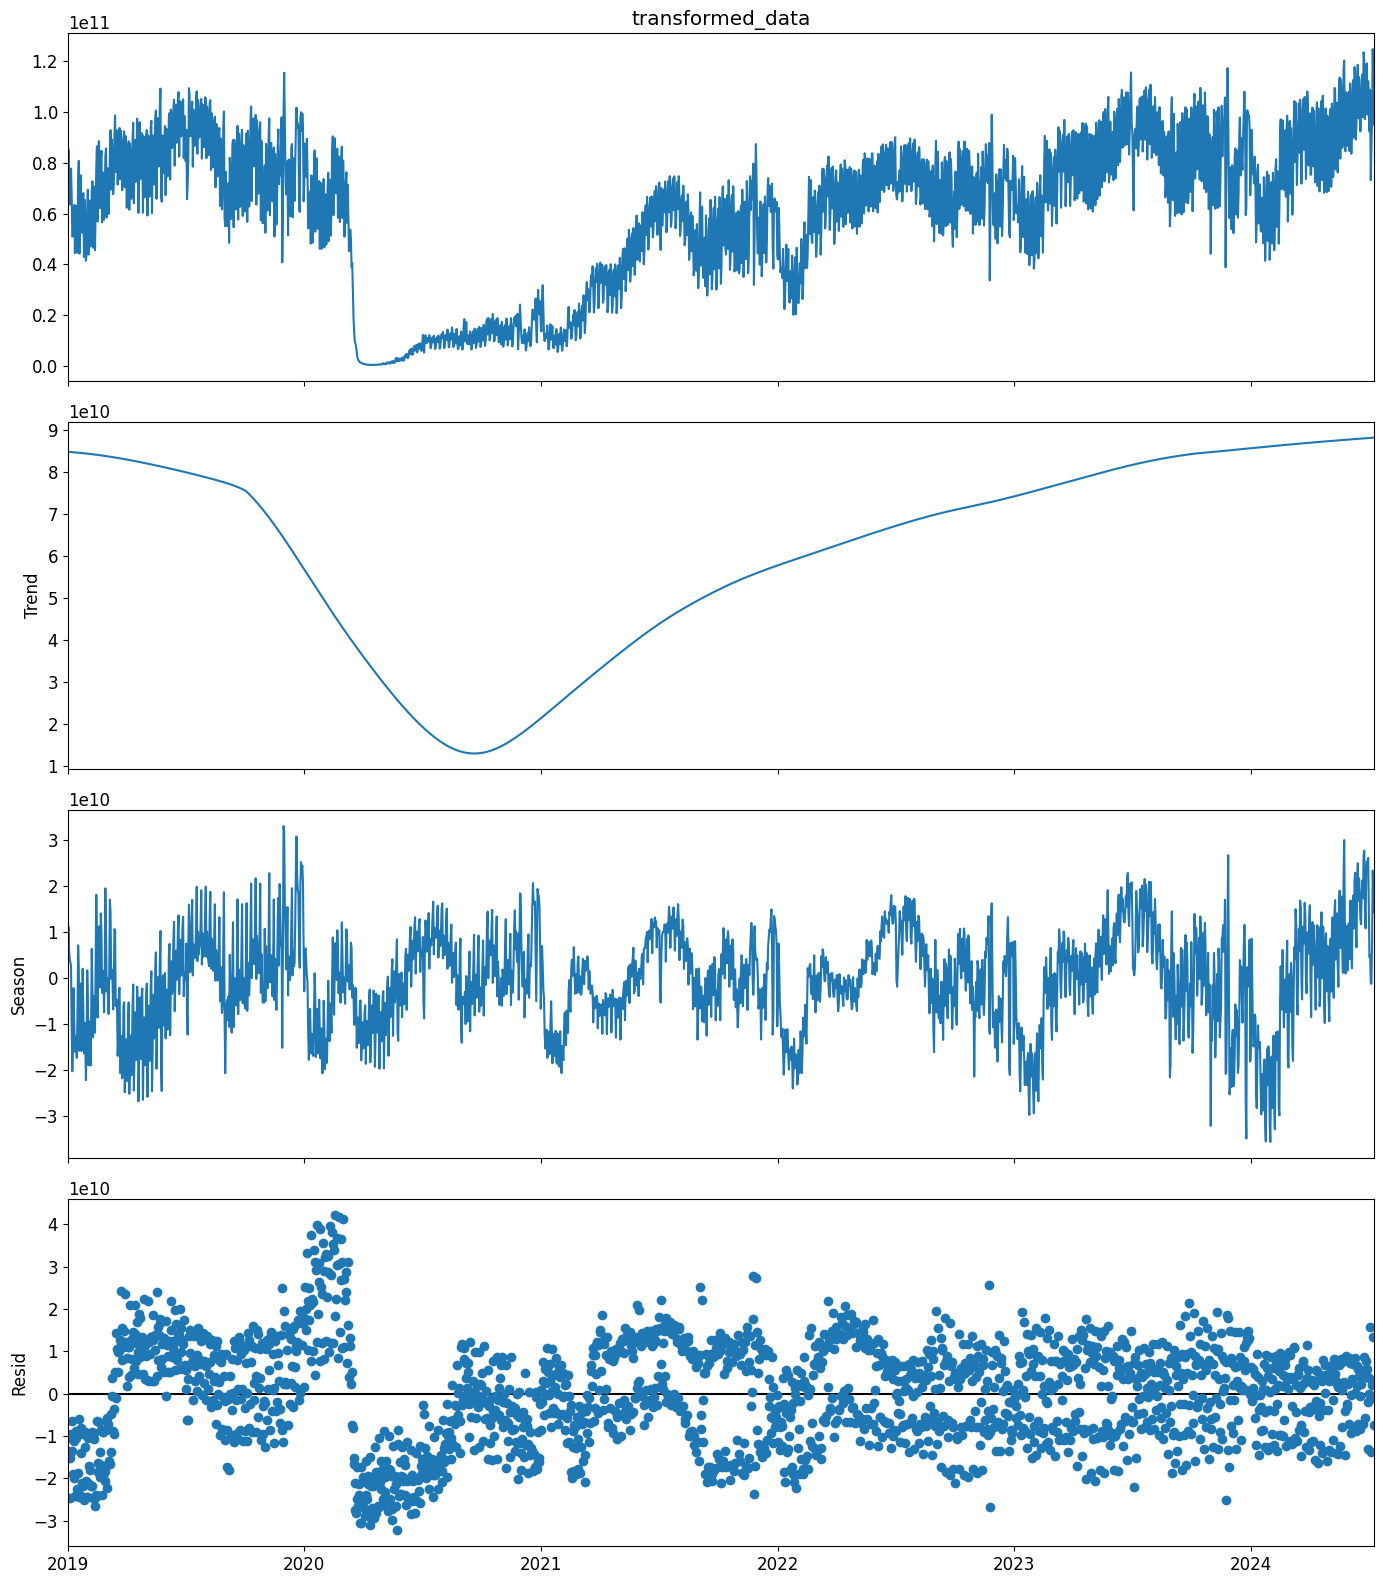

In [28]:
#Diagnostic plots
pc.build_seasonal_plot_stl(df_tsa)

2025-07-01 14:33:52,680 - INFO - Starting outlier detection using STL
2025-07-01 14:33:52,681 - INFO - Time frequency: MS
2025-07-01 14:33:52,681 - INFO - Length of time index: 144.00
2025-07-01 14:33:52,686 - INFO - Additive model detected
2025-07-01 14:33:52,794 - INFO - Completing seasonal decomposition plot using STL


Detected Period:  12
Derived Seasonal:  13


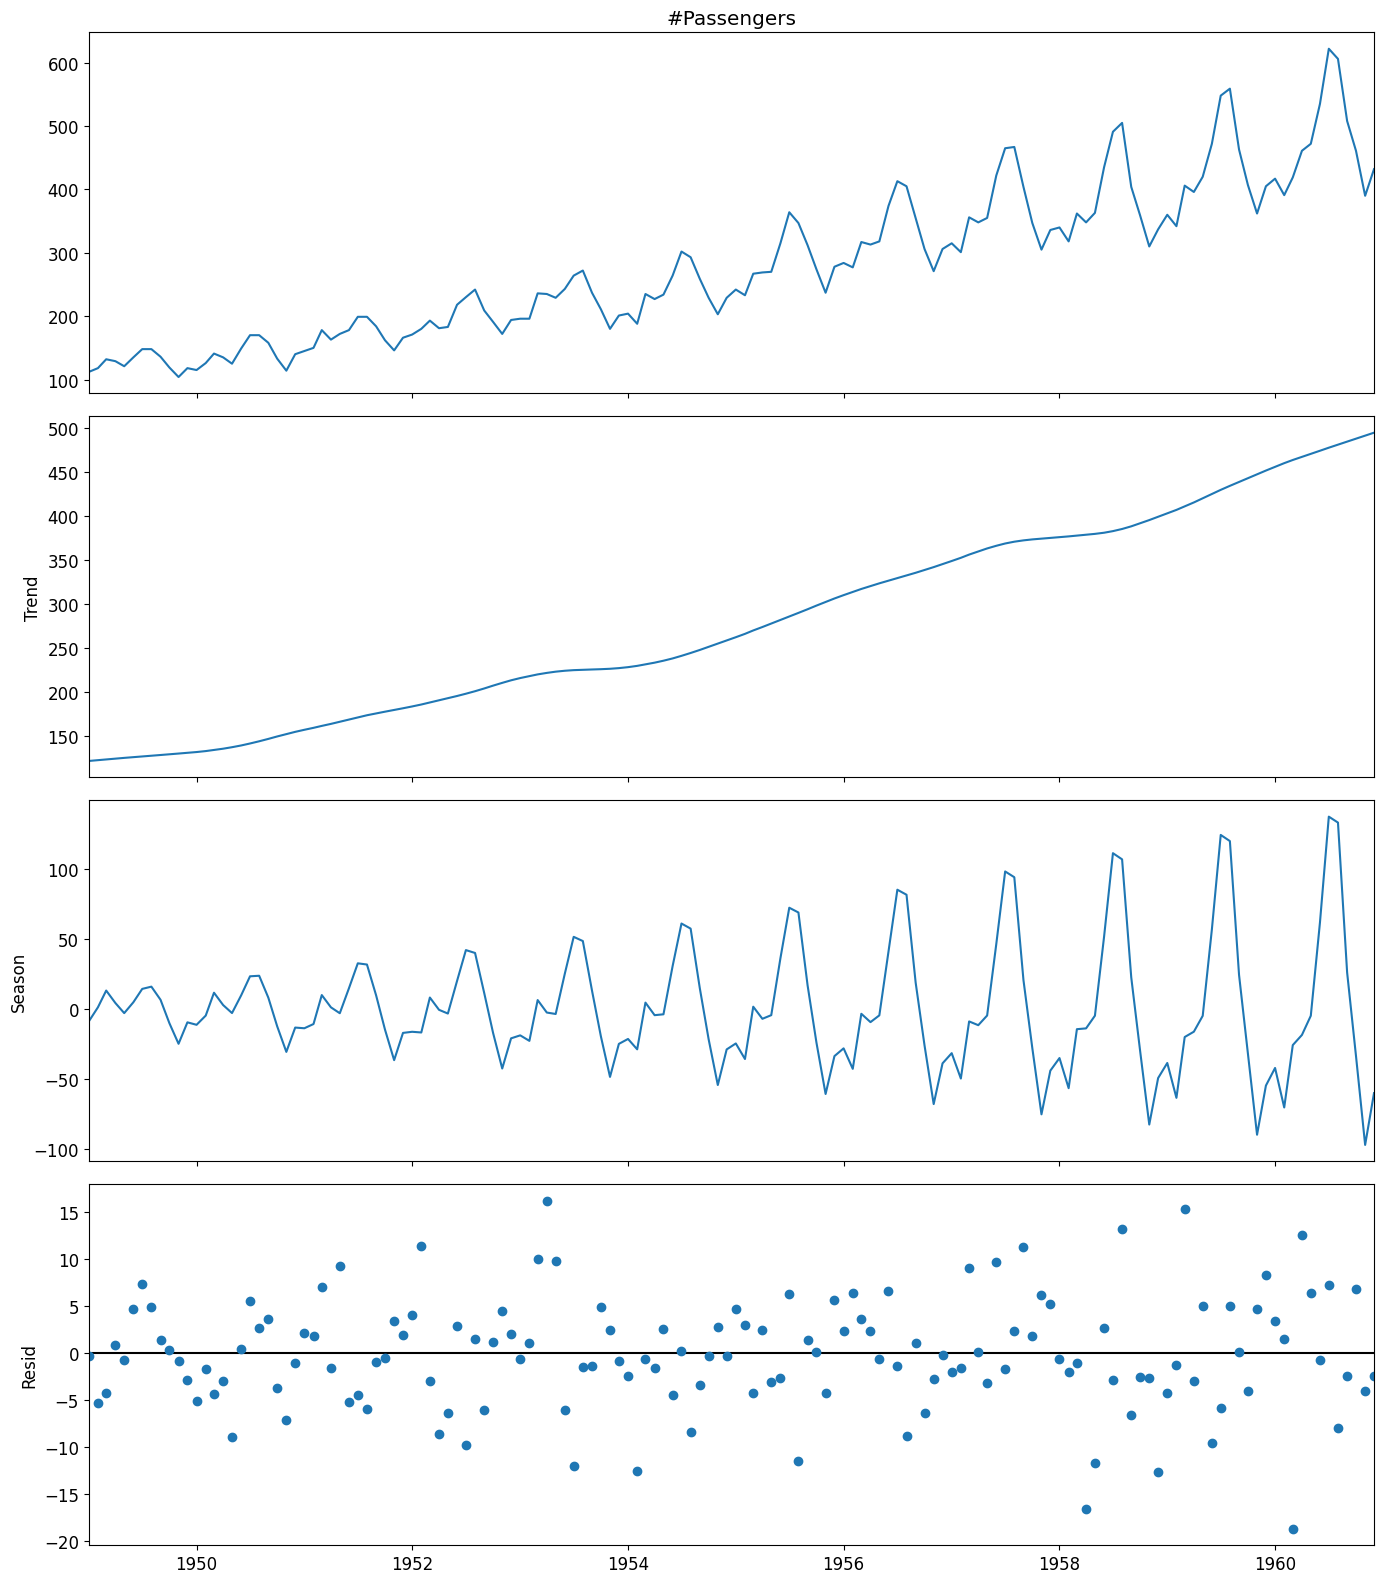

In [29]:
#Diagnostic plots
pc.build_seasonal_plot_stl(df_air)

### Example 3 - Finding Outliers Using Multiple Seasonal-Trend Decomposition using LOESS (MSTL)

In [30]:
pc.detect_outliers_mstl(df_ice)

2025-07-01 14:33:53,049 - INFO - Starting outlier detection using MSTL
2025-07-01 14:33:53,051 - INFO - Time frequency: MS
2025-07-01 14:33:53,051 - INFO - Length of time index: 200.00
2025-07-01 14:33:53,051 - INFO - Derived Period: 12
2025-07-01 14:33:53,056 - INFO - Generating outlier detection using MSTL
2025-07-01 14:33:53,056 - INFO - Outlier detection using MSTL Additive Model
2025-07-01 14:33:53,490 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:53,491 - INFO - Generated outlier detection using STL
2025-07-01 14:33:53,491 - INFO - Completing outlier detection using MSTL


,month,interest
0,2011-04-01,45
1,2016-11-01,46
2,2016-12-01,66
3,2019-07-01,100


In [31]:
# Less than 2 years of data 

df = {
        'Dt': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
        'Value': [100, 120, 140, 750, 160]
}

df = pd.DataFrame(df)
pc.detect_outliers_mstl(df)

2025-07-01 14:33:53,496 - INFO - Starting outlier detection using MSTL
2025-07-01 14:33:53,498 - INFO - Time frequency: D
2025-07-01 14:33:53,498 - INFO - Length of time index: 5.00
2025-07-01 14:33:53,499 - INFO - Less than 2 years of data - Use IQR or Moving Average Method
2025-07-01 14:33:53,499 - INFO - Default - Using IQR method for outlier detection.


,Dt,Value
3,2024-01-04,750


2025-07-01 14:33:53,504 - INFO - Starting outlier detection using MSTL
2025-07-01 14:33:53,506 - INFO - Time frequency: MS
2025-07-01 14:33:53,507 - INFO - Length of time index: 200.00
2025-07-01 14:33:53,507 - INFO - Derived Period: 12
2025-07-01 14:33:53,512 - INFO - Additive model detected
2025-07-01 14:33:53,513 - INFO - Generating outlier detection using MSTL
2025-07-01 14:33:53,513 - INFO - Outlier detection using MSTL Additive Model
2025-07-01 14:33:53,948 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:53,949 - INFO - Generated outlier detection using STL
2025-07-01 14:33:53,949 - INFO - Completing outlier detection using MSTL


Outliers:             interest
month               
2011-04-01        45
2016-11-01        46
2016-12-01        66
2019-07-01       100


<module 'matplotlib.pyplot' from '/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

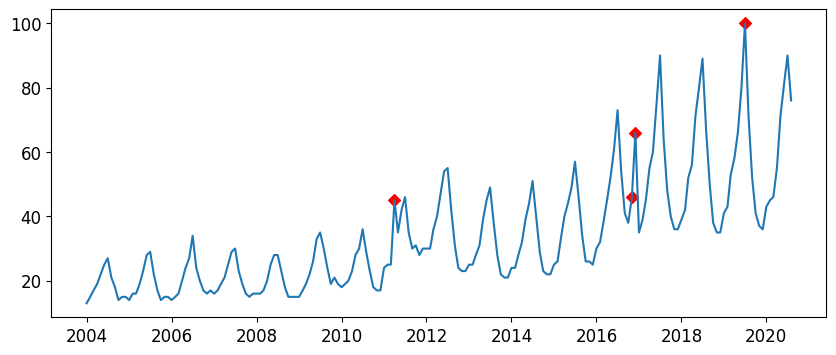

In [32]:
#Diagnostic plots
build_outliers_plot_mstl(df_ice)

2025-07-01 14:33:54,008 - INFO - Starting outlier detection using MSTL
2025-07-01 14:33:54,013 - INFO - Time frequency: D
2025-07-01 14:33:54,013 - INFO - Length of time index: 2017.00
2025-07-01 14:33:54,013 - INFO - Derived Period: (7, 365)
2025-07-01 14:33:55,213 - INFO - Multiplicative model detected
2025-07-01 14:33:55,213 - INFO - Generating outlier detection using MSTL
2025-07-01 14:33:55,213 - INFO - Outlier detection using MSTL Multiplicative Model
2025-07-01 14:33:56,659 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:56,660 - INFO - Generated outlier detection using STL
2025-07-01 14:33:56,661 - INFO - Completing outlier detection using MSTL


Outliers:             passengers
date                  
2019-11-27     2624250
2020-01-01     2196916
2020-01-02     2461726
2020-01-04     2244162
2020-01-05     2491894
...                ...
2020-03-06     2274787
2021-11-23     2217635
2021-11-24     2331880
2022-11-23     2465337
2023-11-25     2605387

[63 rows x 1 columns]


<module 'matplotlib.pyplot' from '/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

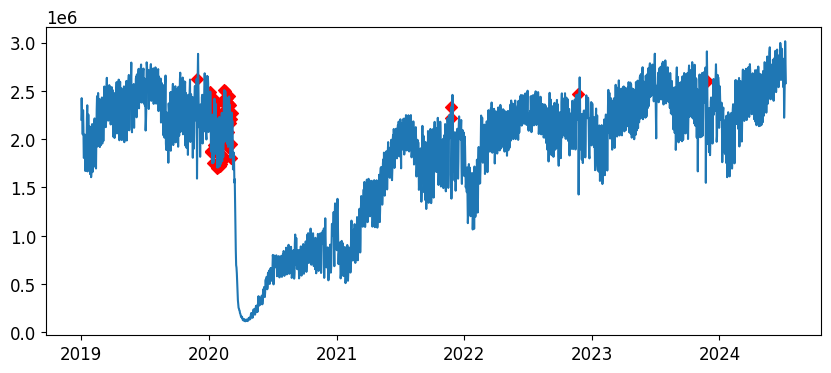

In [33]:
pc.build_outliers_plot_mstl(df_tsa)

In [34]:
x = pc.detect_outliers_latest_mstl(df_tsa) 
print(x)

2025-07-01 14:33:56,720 - INFO - Detecting the latest outliers.
2025-07-01 14:33:56,721 - INFO - Starting outlier detection using MSTL
2025-07-01 14:33:56,722 - INFO - Time frequency: D
2025-07-01 14:33:56,723 - INFO - Length of time index: 2017.00
2025-07-01 14:33:56,723 - INFO - Derived Period: (7, 365)
2025-07-01 14:33:57,921 - INFO - Generating outlier detection using MSTL
2025-07-01 14:33:57,921 - INFO - Outlier detection using MSTL Multiplicative Model
2025-07-01 14:33:59,363 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:33:59,364 - INFO - Generated outlier detection using STL
2025-07-01 14:33:59,364 - INFO - Completing outlier detection using MSTL
2025-07-01 14:33:59,364 - INFO - Detected the latest outlier!


         date  passengers
62 2023-11-25     2605387


In [35]:
pc.detect_outliers_today_mstl(df_tsa) 

2025-07-01 14:33:59,367 - INFO - Detecting today's outliers.
2025-07-01 14:33:59,367 - INFO - Starting outlier detection using MSTL
2025-07-01 14:33:59,370 - INFO - Time frequency: D
2025-07-01 14:33:59,370 - INFO - Length of time index: 2017.00
2025-07-01 14:33:59,370 - INFO - Derived Period: (7, 365)
2025-07-01 14:34:00,565 - INFO - Generating outlier detection using MSTL
2025-07-01 14:34:00,566 - INFO - Outlier detection using MSTL Multiplicative Model
2025-07-01 14:34:01,997 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:34:01,998 - INFO - Generated outlier detection using STL
2025-07-01 14:34:01,999 - INFO - Completing outlier detection using MSTL
2025-07-01 14:34:01,999 - INFO - No outliers detected today.


'No Outliers Today!'

2025-07-01 14:34:02,002 - INFO - Starting outlier detection using MSTL
2025-07-01 14:34:02,003 - INFO - Time frequency: MS
2025-07-01 14:34:02,003 - INFO - Length of time index: 200.00
2025-07-01 14:34:02,003 - INFO - Derived Period: 12
2025-07-01 14:34:02,008 - INFO - Additive model detected
2025-07-01 14:34:02,105 - INFO - Completing seasonal decomposition plot using MSTL


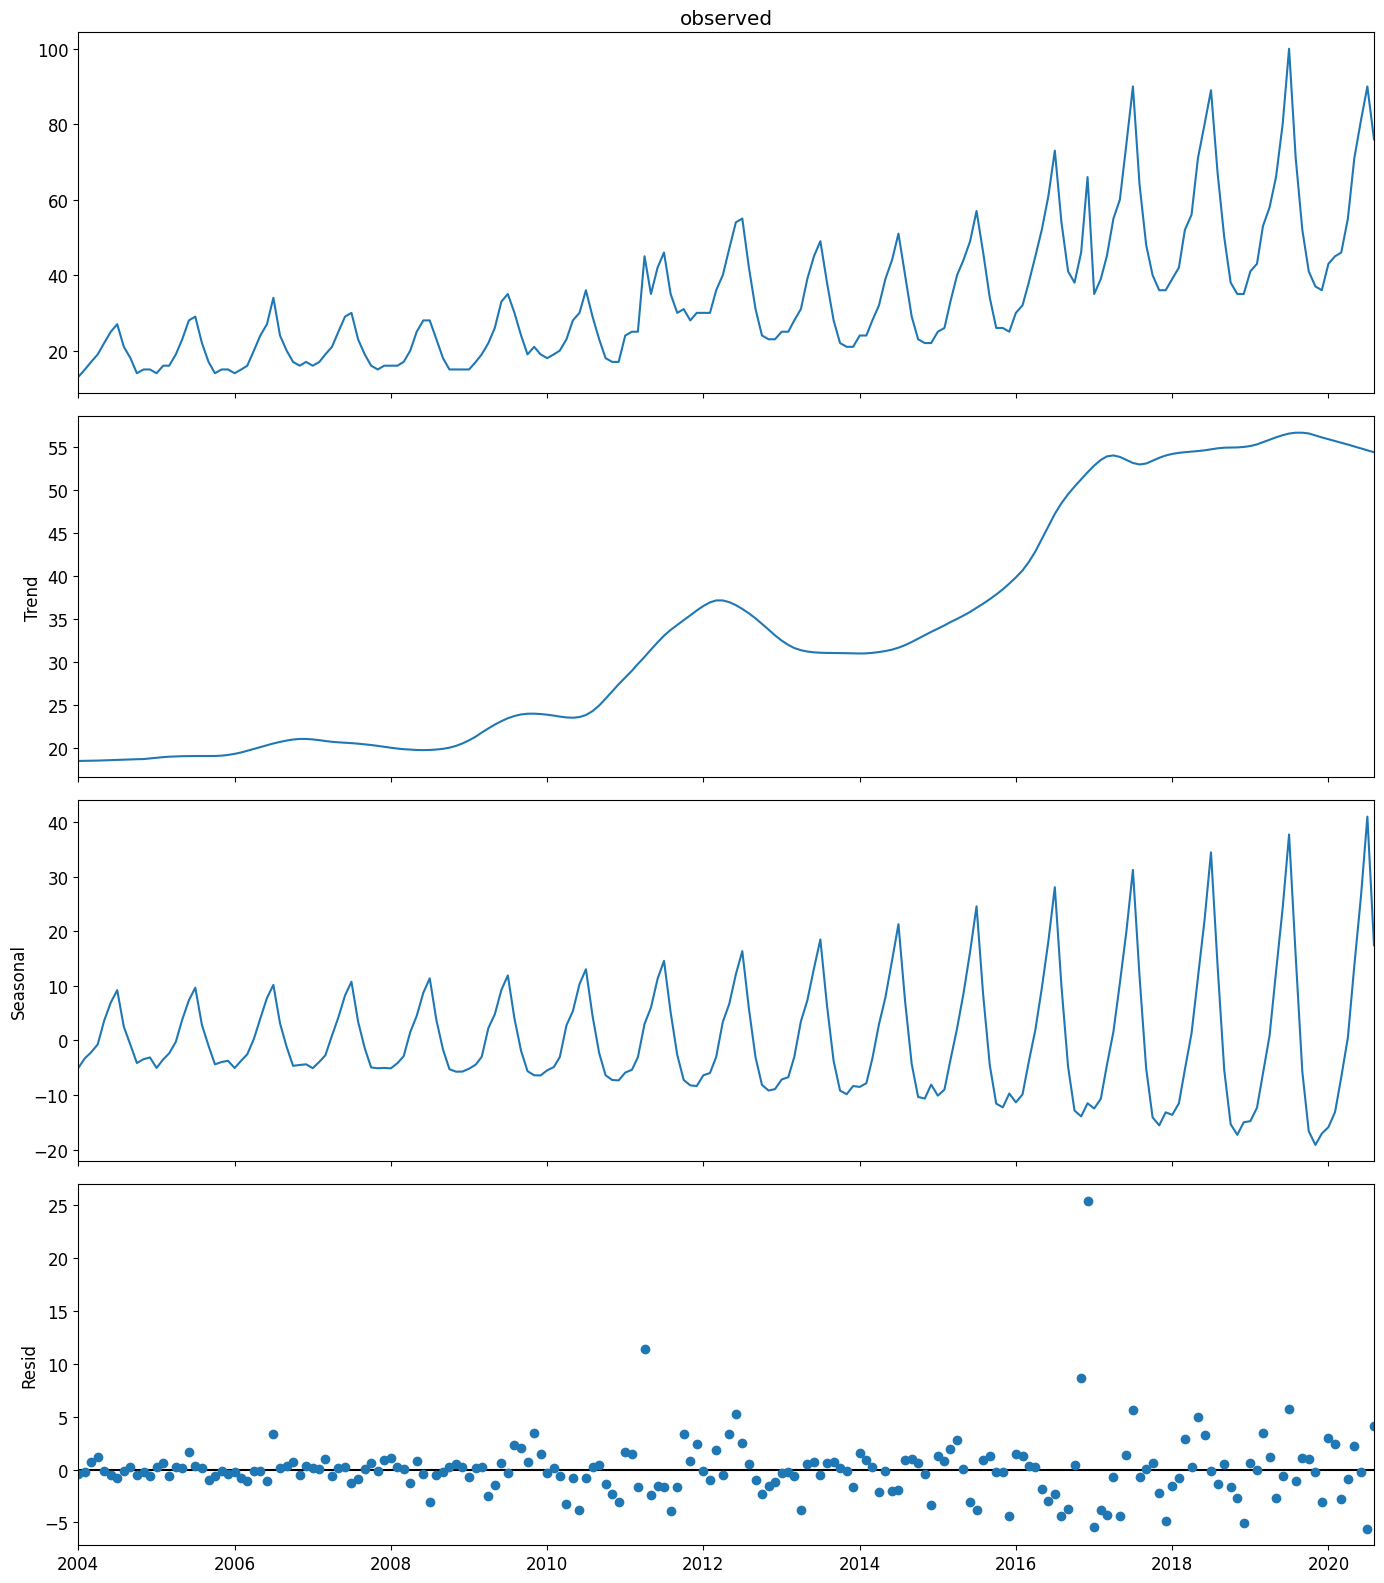

In [36]:
#Diagnostic plots
build_seasonal_plot_mstl(df_ice)

2025-07-01 14:34:02,389 - INFO - Starting outlier detection using MSTL
2025-07-01 14:34:02,390 - INFO - Time frequency: MS
2025-07-01 14:34:02,390 - INFO - Length of time index: 144.00
2025-07-01 14:34:02,391 - INFO - Derived Period: 12
2025-07-01 14:34:02,395 - INFO - Additive model detected
2025-07-01 14:34:02,482 - INFO - Completing seasonal decomposition plot using MSTL


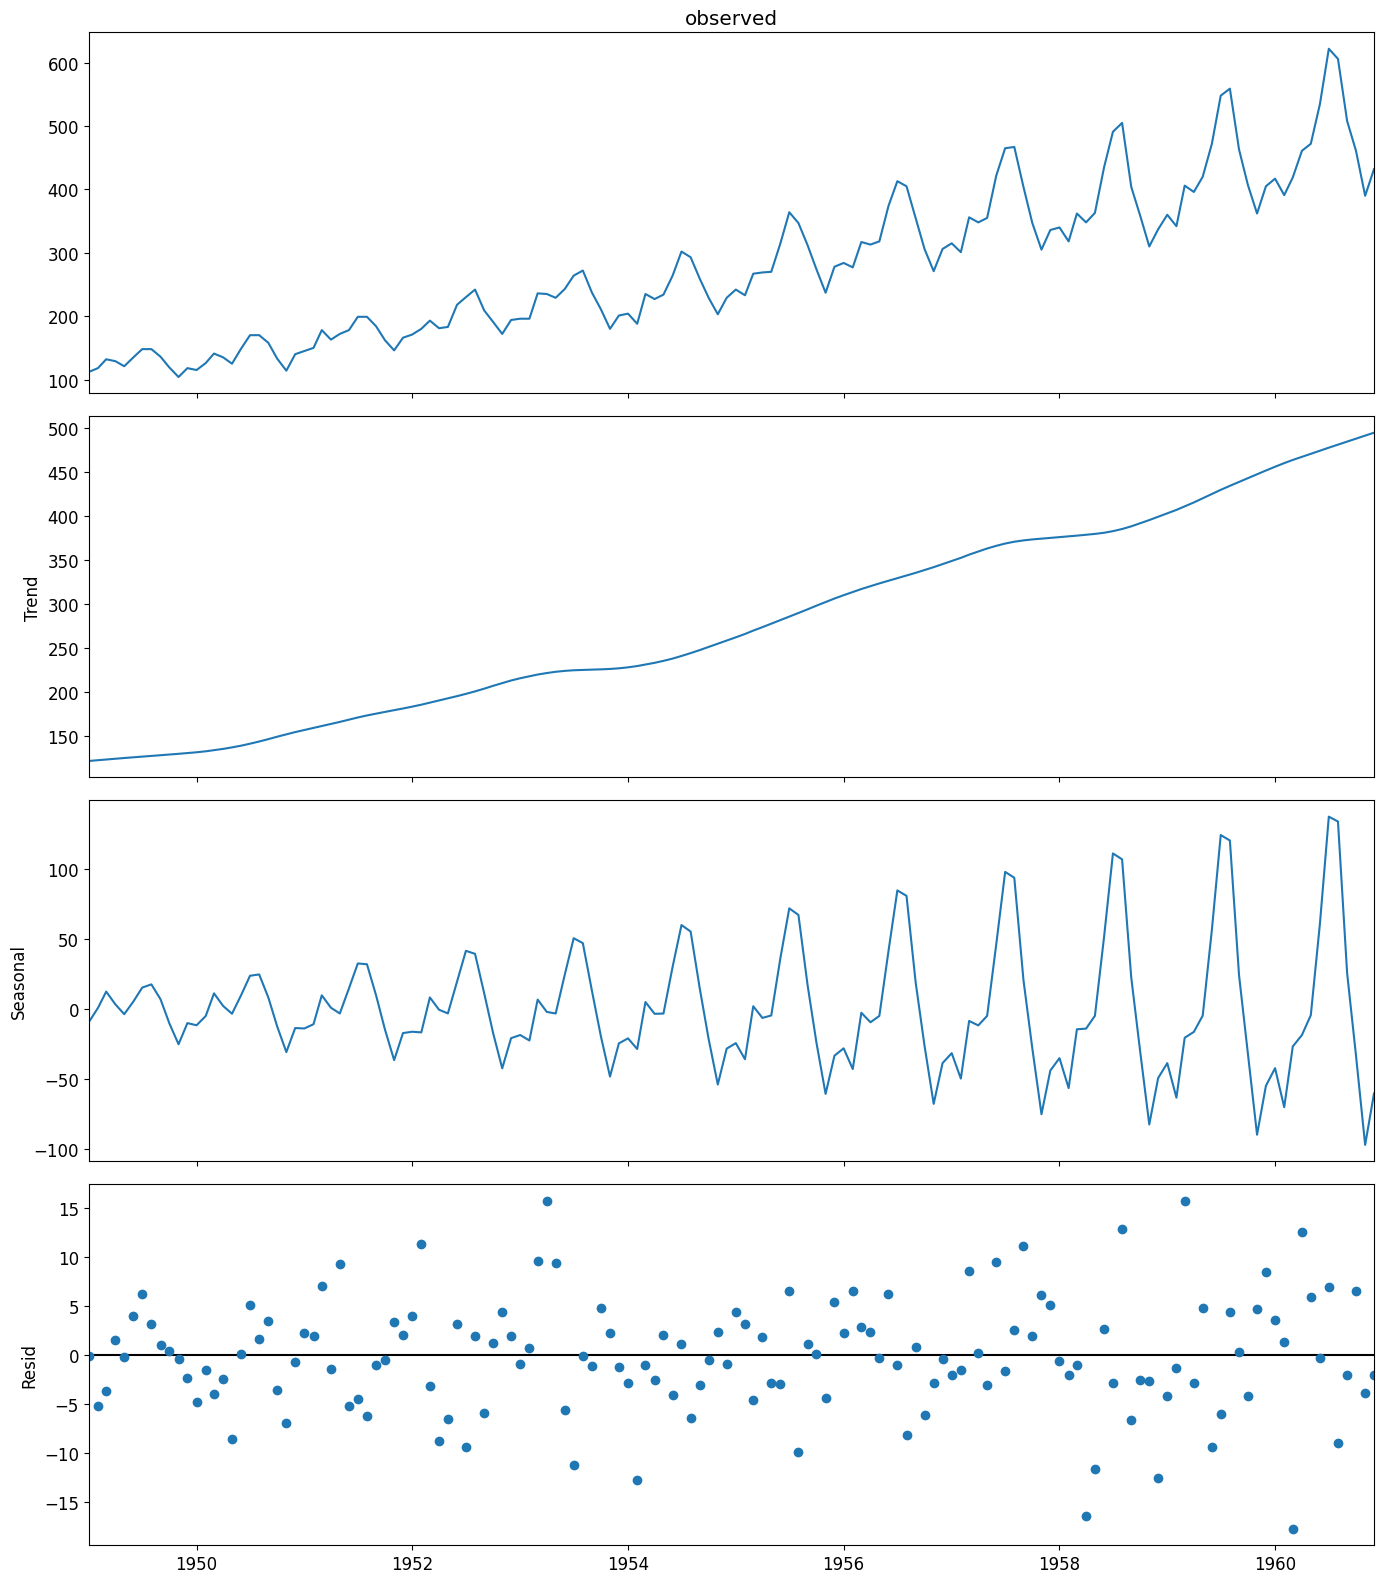

In [37]:
#Diagnostic plots
build_seasonal_plot_mstl(df_air)

2025-07-01 14:34:02,742 - INFO - Starting outlier detection using MSTL
2025-07-01 14:34:02,744 - INFO - Time frequency: MS
2025-07-01 14:34:02,744 - INFO - Length of time index: 144.00
2025-07-01 14:34:02,744 - INFO - Derived Period: 12
2025-07-01 14:34:02,749 - INFO - Additive model detected
2025-07-01 14:34:02,750 - INFO - Generating outlier detection using MSTL
2025-07-01 14:34:02,750 - INFO - Outlier detection using MSTL Additive Model
2025-07-01 14:34:03,177 - INFO - Residuals Likely Normally Distributed - Using Z Score
2025-07-01 14:34:03,177 - INFO - Generated outlier detection using STL
2025-07-01 14:34:03,178 - INFO - Completing outlier detection using MSTL


Outliers:             #Passengers
Month                  
1953-04-01          235
1954-02-01          188
1958-04-01          348
1958-08-01          505
1958-12-01          337
1959-03-01          406
1960-03-01          419
1960-04-01          461


<module 'matplotlib.pyplot' from '/Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

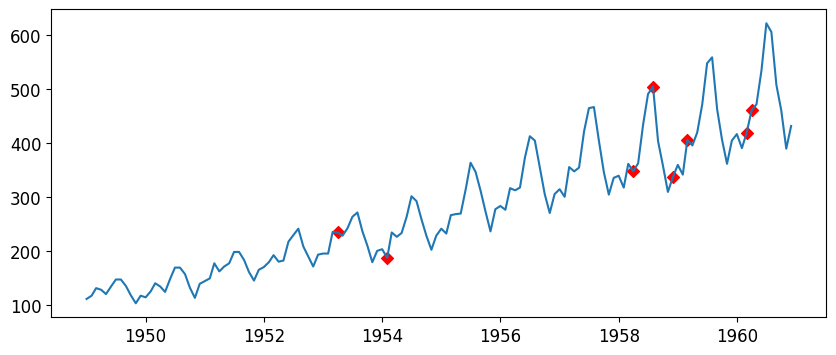

In [38]:
#Diagnostic plots
build_outliers_plot_mstl(df_air)

2025-07-01 14:34:03,234 - INFO - Starting outlier detection using MSTL
2025-07-01 14:34:03,237 - INFO - Time frequency: D
2025-07-01 14:34:03,237 - INFO - Length of time index: 2017.00
2025-07-01 14:34:03,237 - INFO - Derived Period: (7, 365)
2025-07-01 14:34:04,444 - INFO - Multiplicative model detected
2025-07-01 14:34:04,551 - INFO - Completing seasonal decomposition plot using MSTL


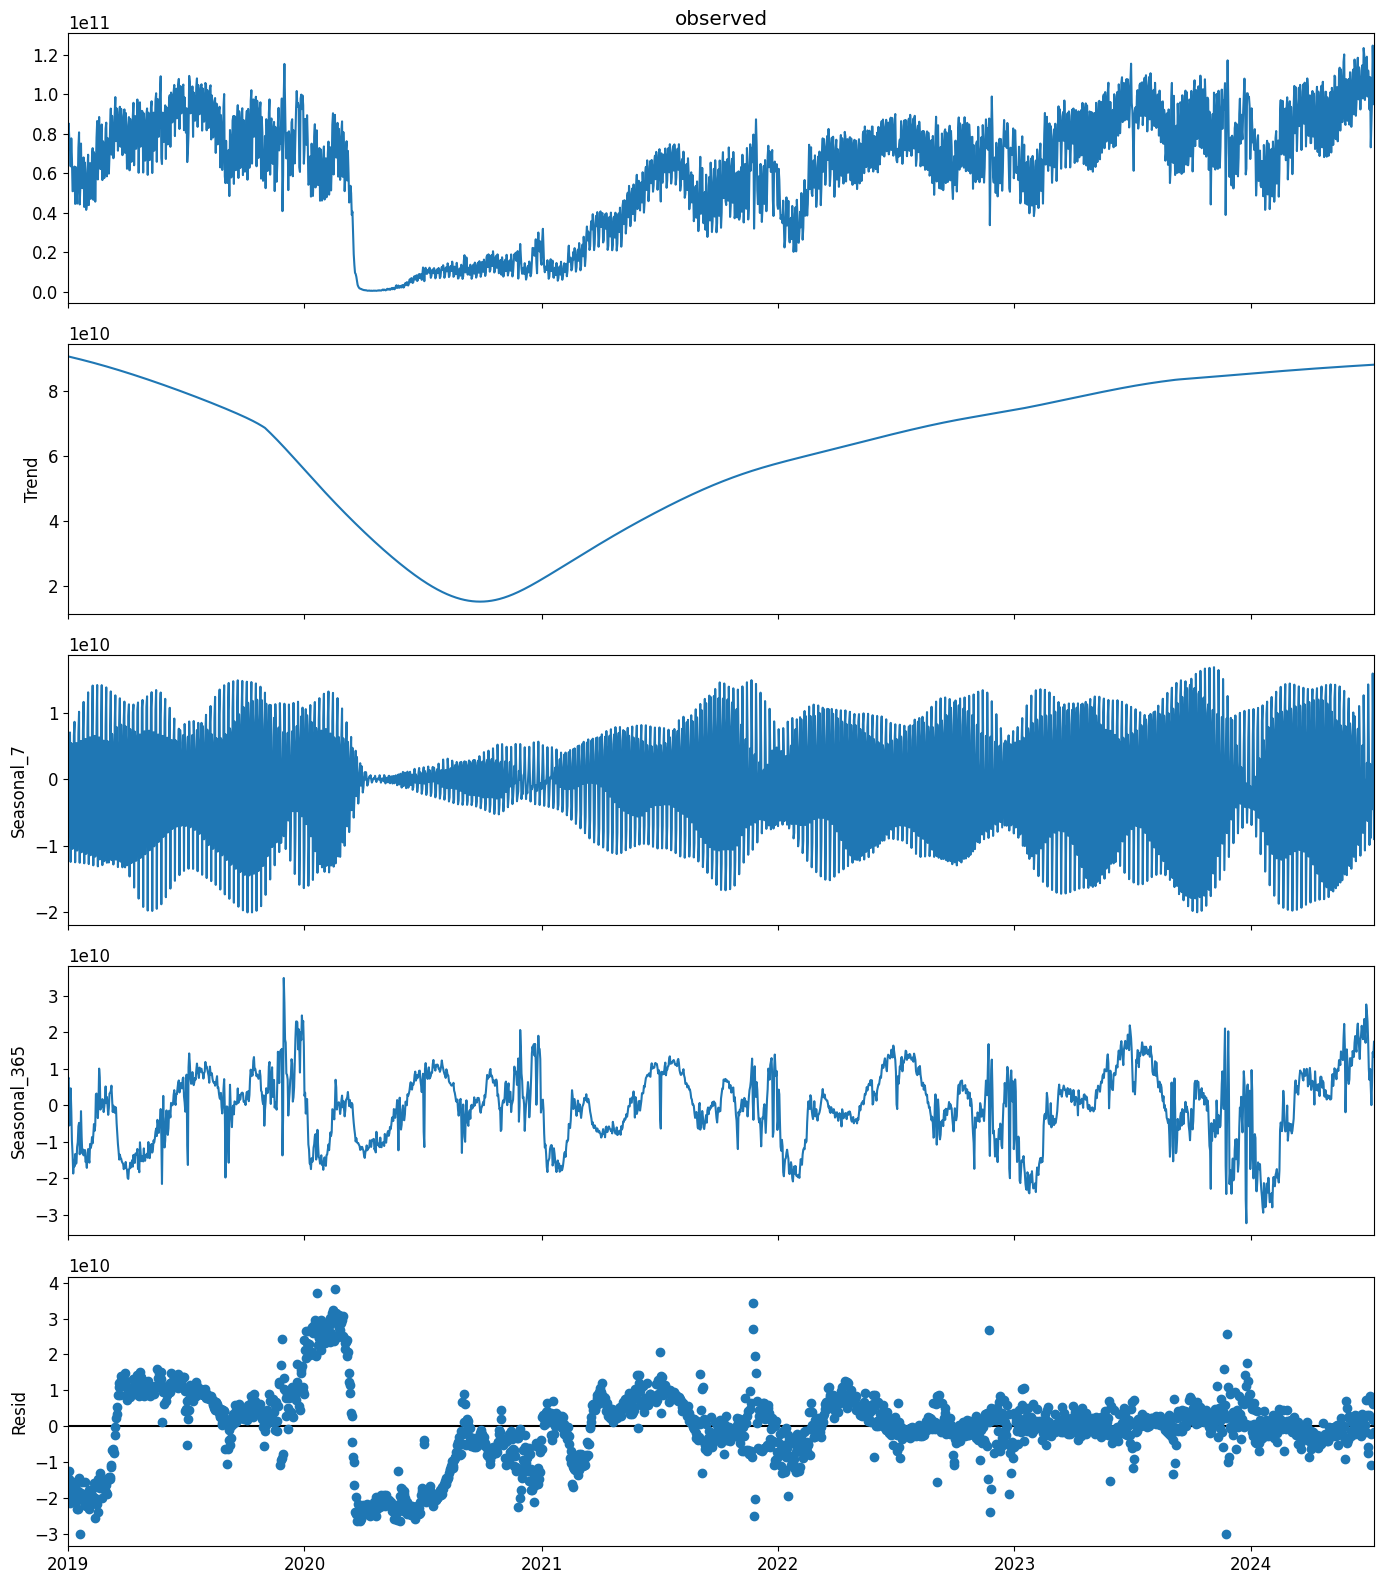

In [39]:
build_seasonal_plot_mstl(df_tsa)

### Example 2 - Finding Outliers Using the Generalized ESD or Seasonal ESD algorithm (Used by Twitter)

In [40]:
pc.detect_outliers_esd(df_tsa)

2025-07-01 14:34:04,961 - INFO - Checking for Normality - Shapiro-Wilk Test Results:
2025-07-01 14:34:04,961 - INFO - Starting Time series frequency detection
2025-07-01 14:34:04,963 - INFO - Time frequency: D
2025-07-01 14:34:04,964 - INFO - Length of time index: 2017.00
2025-07-01 14:34:04,964 - INFO - Completing Time series frequency detection


Data Not Normally Distributed - Using Sesonal ESD Method


2025-07-01 14:34:07,038 - INFO - Generated outliers by Seasonal ESD Method
2025-07-01 14:34:07,038 - INFO - Outliers detected by Seasonal ESD Method


,date,passengers
0,2020-03-24,330808
1,2020-03-26,252039
2,2020-03-27,244702
3,2020-03-28,226850
4,2020-03-30,197539
...,...,...
95,2020-07-29,612033
96,2020-08-01,749886
97,2020-08-04,583261
98,2020-08-08,723834


2025-07-01 14:34:07,043 - INFO - Testing for Normality - Shapiro-Wilk Test Results:
2025-07-01 14:34:07,043 - INFO - Statistic: 0.893
2025-07-01 14:34:07,043 - INFO - p-value: 0.000
2025-07-01 14:34:07,043 - INFO - Starting Time series frequency detection
2025-07-01 14:34:07,046 - INFO - Time frequency: D
2025-07-01 14:34:07,046 - INFO - Length of time index: 2017.00
2025-07-01 14:34:07,046 - INFO - Completing Time series frequency detection


Data Not Normally Distributed - Using Sesonal ESD Method


2025-07-01 14:34:09,214 - INFO - Generated outliers by Seasonal ESD Method
2025-07-01 14:34:09,226 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-01 14:34:09,229 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Outliers detected by Seasonal ESD Method:
          date  passengers
448 2020-03-24      330808
450 2020-03-26      252039
451 2020-03-27      244702
452 2020-03-28      226850
454 2020-03-30      197539
..         ...         ...
575 2020-07-29      612033
578 2020-08-01      749886
581 2020-08-04      583261
585 2020-08-08      723834
695 2020-11-26      562697

[100 rows x 2 columns]


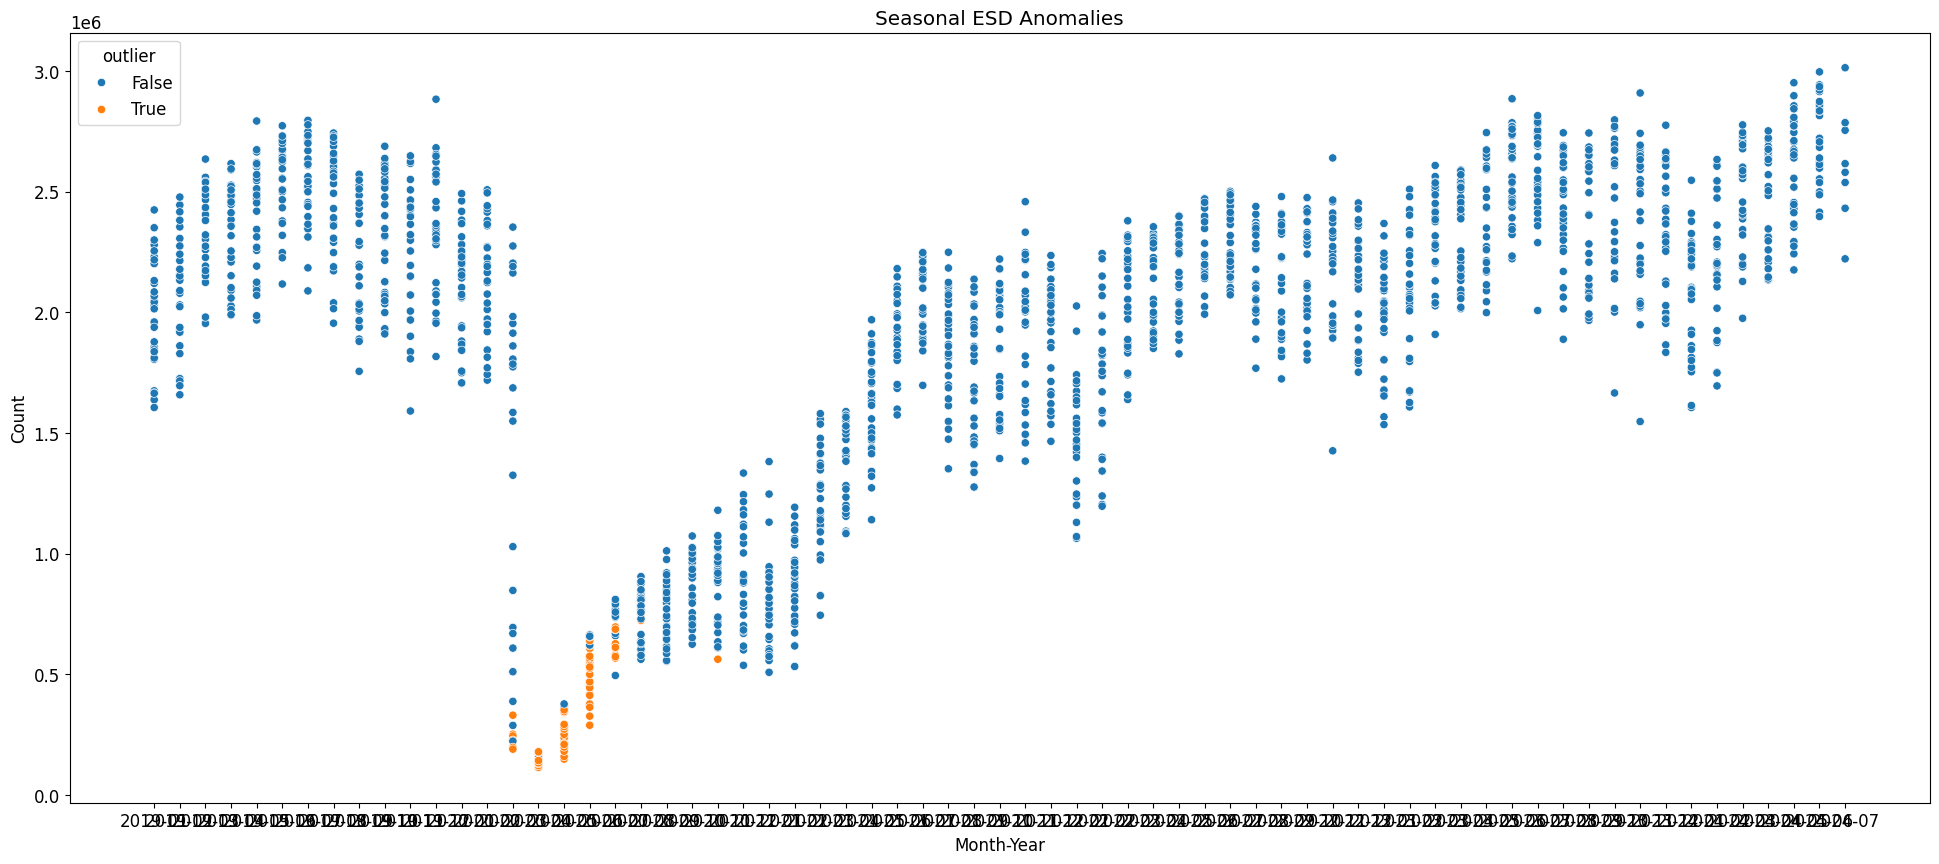

In [41]:
pc.build_outliers_plot_esd(df_tsa)

### Example 5 - Finding Outliers Using IQR

In [42]:
import pandas as pd

df = {
        'Dt': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
        'Value': [100, 120, 140, 450, 160]
}

df = pd.DataFrame(df)
pc.detect_outliers_classic(df)

,Value
Dt,
2024-01-04,450


2025-07-01 14:34:09,391 - INFO - Building IQR plot to see outliers


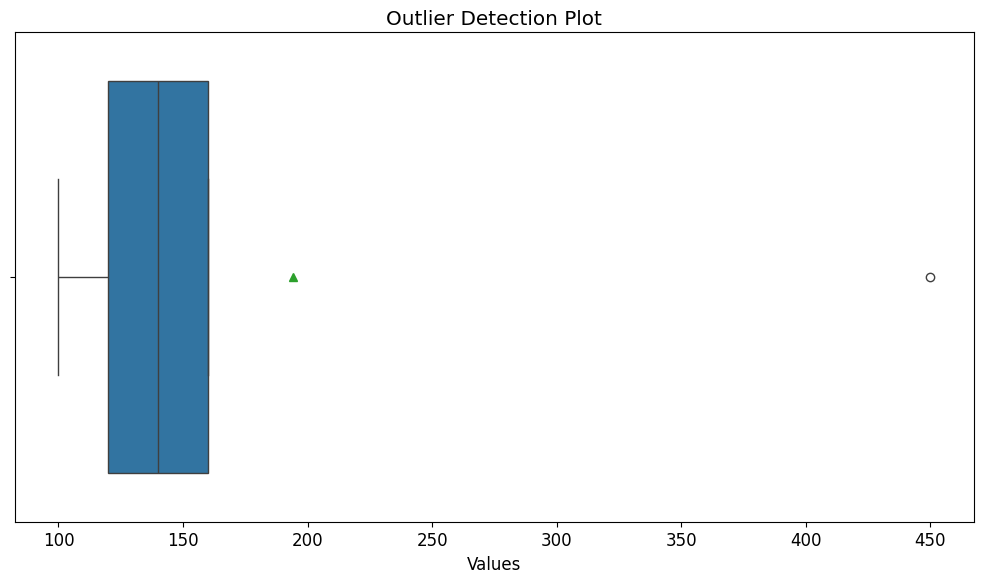

In [43]:
build_iqr_plot(df)

### Example 6 - Finding Outliers Using Moving Average

In [44]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'random numbers': np.random.randn(200)})
df.head(20)

,random numbers
0,-0.750191
1,0.067917
2,-0.920464
3,0.418567
4,-1.171652
5,-1.016763
6,-0.250554
7,0.963412
8,0.037660
9,0.761876


In [45]:
pc.detect_outliers_moving_average(df_tsa)

,date,passengers
0,2020-03-22,510881
1,2020-03-23,388154
2,2020-03-24,330808
3,2020-03-25,288459
4,2020-03-26,252039
...,...,...
93,2020-08-26,578447
94,2020-12-09,601319
95,2021-01-13,605887
96,2021-01-27,574099


2025-07-01 14:34:09,525 - INFO - Plotting outliers using Moving Average method
2025-07-01 14:34:09,603 - INFO - Completed outliers plotting using Moving Average method


Outlier detection using Moving Average method completed
Outliers:          date  passengers
0  2020-03-22      510881
1  2020-03-23      388154
2  2020-03-24      330808
3  2020-03-25      288459
4  2020-03-26      252039
..        ...         ...
93 2020-08-26      578447
94 2020-12-09      601319
95 2021-01-13      605887
96 2021-01-27      574099
97 2021-02-03      619345

[98 rows x 2 columns]


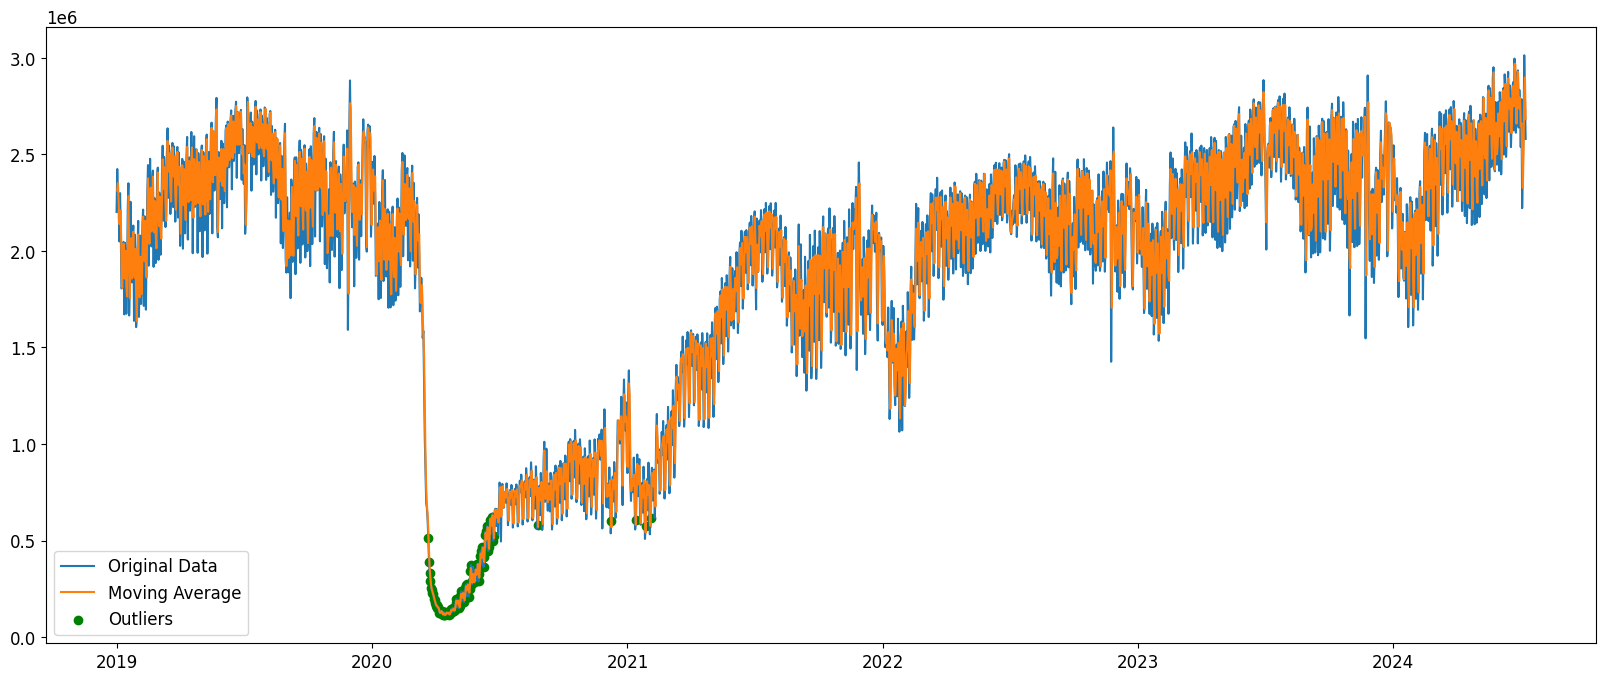

In [46]:
pc.build_outliers_plot_moving_average(df_tsa)

### Example 7 - Miscellaneous diagnostic function - Stationarity Check

In [47]:
conduct_stationarity_check(df_ice)

2025-07-01 14:34:09,711 - INFO - Starting ADF stationarity check
2025-07-01 14:34:09,718 - INFO - ADF Statistic: -0.072707
2025-07-01 14:34:09,718 - INFO - p-value: 0.952090
2025-07-01 14:34:09,718 - INFO - Critical Values:
2025-07-01 14:34:09,718 - INFO - 	1%: -3.466
2025-07-01 14:34:09,718 - INFO - 	5%: -2.877
2025-07-01 14:34:09,719 - INFO - 	10%: -2.575
2025-07-01 14:34:09,719 - INFO - Completed ADF stationarity check
2025-07-01 14:34:09,719 - INFO - Starting KPSS stationarity check
/Users/sarika/Documents/GitHub/pycatcher/src/pycatcher/diagnostics.py:308: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(df_pandas.iloc[:, -1])
2025-07-01 14:34:09,721 - INFO - KPSS Statistic: 2.040868
2025-07-01 14:34:09,721 - INFO - p-value: 0.010000
2025-07-01 14:34:09,721 - INFO - n_lags: 8.000000
2025-07-01 14:34:09,721 - INFO 

ADF - The series is not Stationary


KPSS - The series is not Stationary


In [50]:
!pip show pycatcher

Name: pycatcher
Version: 0.0.68
Summary: This package identifies outlier(s) for a given time-series dataset in simple steps. It supports day, week, month and quarter level time-series data.
Home-page: https://github.com/aseemanand/pycatcher/
Author: Aseem Anand
Author-email: aseemanand@gmail.com
License: MIT
Location: /Users/sarika/Documents/GitHub/pycatcher/venv/lib/python3.12/site-packages
Editable project location: /Users/sarika/Documents/GitHub/pycatcher
Requires: flask, mkdocs, mkdocs-material, pandas, pyod, pyspark, scipy, seaborn, sesd, statsmodels
Required-by: 
